<a href="https://colab.research.google.com/github/urmiMahapatra/WalmartPrediction/blob/main/Walmart_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the important libreary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset= pd.read_csv("Walmart.csv")
dataset.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
# check the information and statistcs of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
dataset.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [ ]:
# chage the date  as date type
dataset["Date"]=pd.to_datetime(dataset["Date"],format="%d-%m-%Y")

In [ ]:
# check again to see the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
# checking the missing and duplicate values
dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# check any value is in negetive or not
dataset.loc[dataset["Weekly_Sales"]<=0]

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []

In [ ]:
dataset.duplicated().sum()

0

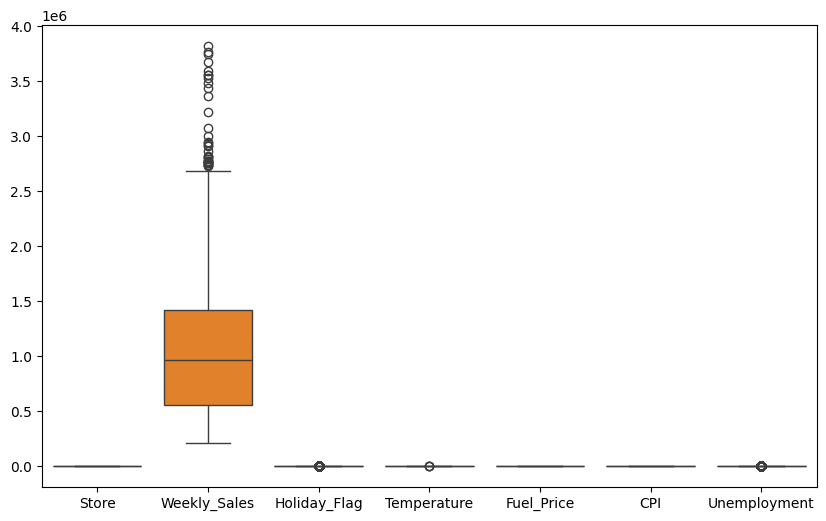

In [ ]:
# check the outliers
plt.figure(figsize=(10,6))
sns.boxplot(dataset)
plt.show()
# sale can be higher so i am not removing it

In [ ]:
# how many stores are in dataset
store_count= dataset["Store"].nunique()
store_count

45

In [ ]:
# extract the month and year separetly to understand properly
date_dataset=dataset.copy()
date_dataset["Month"]= dataset["Date"].dt.month
date_dataset["Year"]= dataset["Date"].dt.year
date_dataset

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  Year  
0     211.096358         8.106      2  2010  
1     211.242170         8.106      2  2010  
2     211.289143         8.106      2  2010  
3     211.319643         8.106      2  2010  
4     211.350143         8.106      3  2010  
...          ...           ...    ...   ...  
6430  192.013558         8.684      9  2012  
6431  192.170412         8.667     10  2012  
6432  192.327265         8.667     10  2012  
6433  192.330854         8.667     10  2012  
6434  192.308899         8.667     10  2012  

[6435 rows x 10 columns]

# Some attribute visualization and their analysis

## # . If the weekly sales show a seasonal trend, when and what could be the reason?


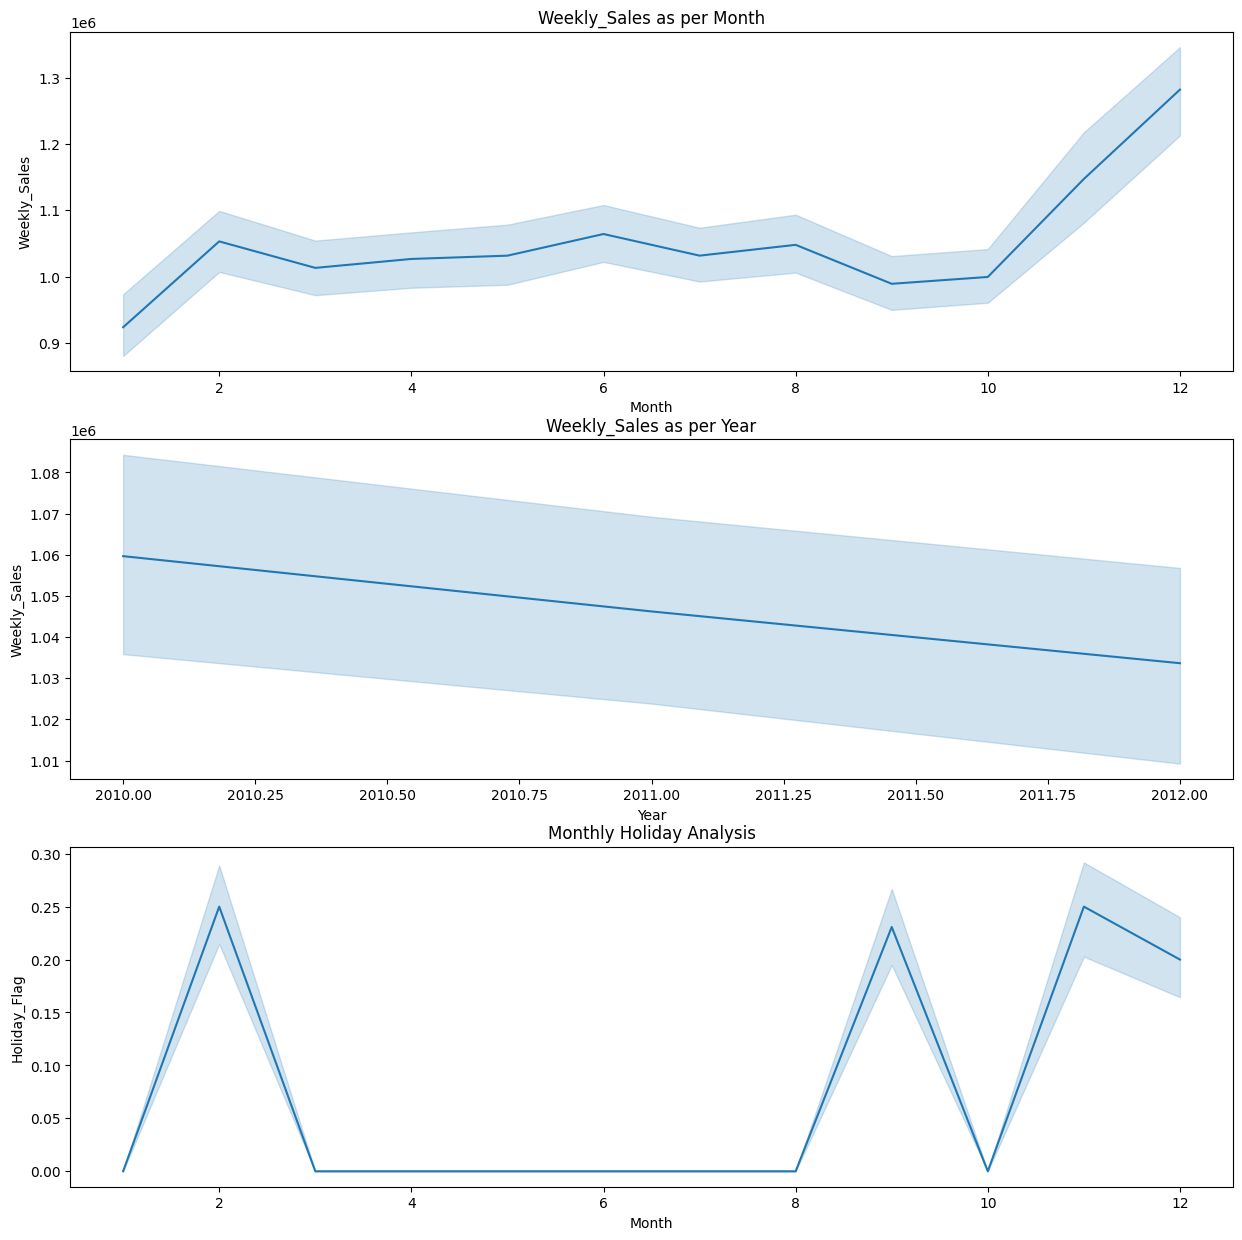

In [ ]:
# visualize weekly sales with dates
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.lineplot(x="Month",y="Weekly_Sales",data=date_dataset )
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per Month")


plt.subplot(3,1,2)
sns.lineplot(x="Year",y="Weekly_Sales",data=date_dataset )
plt.xlabel("Year")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per Year")

plt.subplot(3,1,3)
sns.lineplot(x="Month",y="Holiday_Flag",data=date_dataset )
plt.xlabel("Month")
plt.ylabel("Holiday_Flag")
plt.title("Monthly Holiday Analysis")

plt.show()


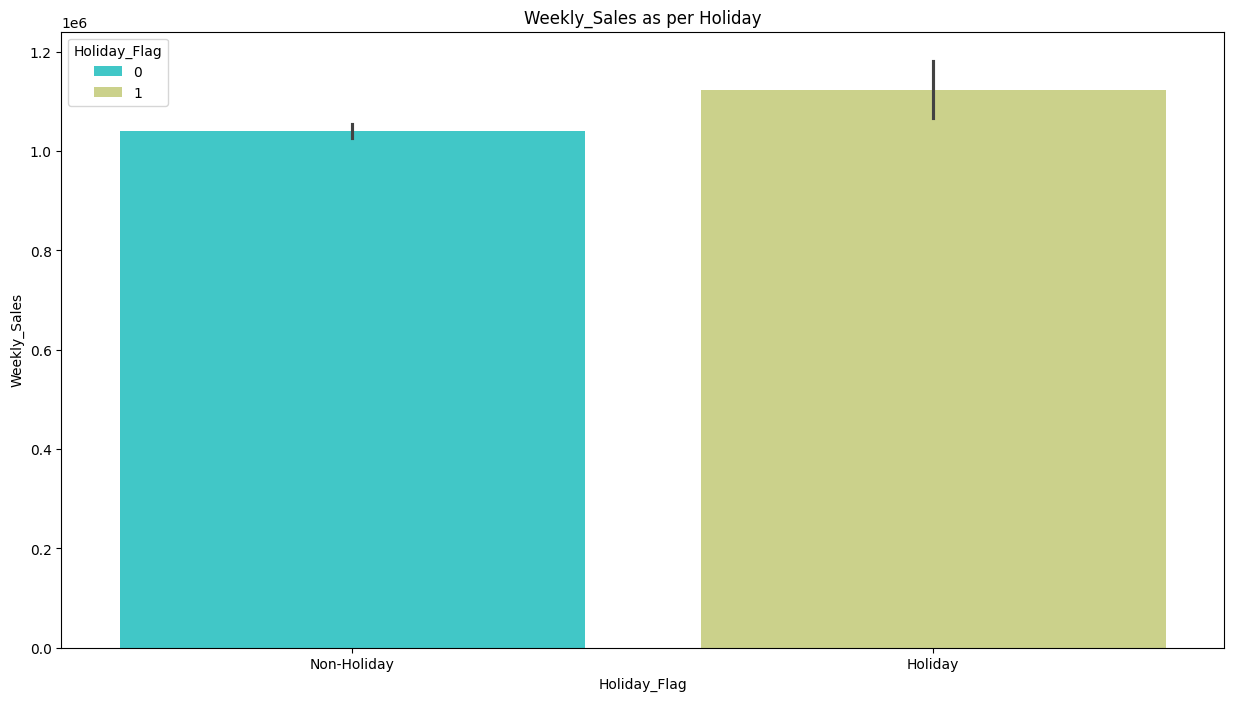

In [ ]:

# weekly sale with the holiday flag

plt.figure(figsize=(15,8))
label=["Non-Holiday","Holiday"]
sns.barplot(x="Holiday_Flag",y="Weekly_Sales",data= dataset,hue="Holiday_Flag",palette="rainbow")
plt.xticks(range(2),label)
plt.xlabel("Holiday_Flag")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per Holiday")
plt.show()


In [ ]:
# decompostion of weekly sales
store_sale= dataset.groupby("Date")["Weekly_Sales"].sum().reset_index()
store_sale.set_index("Date",inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition = seasonal_decompose(store_sale["Weekly_Sales"], period=13)

# decomposition of temperature
temparature_data= dataset.groupby("Date")["Temperature"].sum().reset_index()
temparature_data.set_index("Date",inplace=True)
temparature_decompostion= seasonal_decompose(temparature_data["Temperature"],period=13)

Figure(640x480)


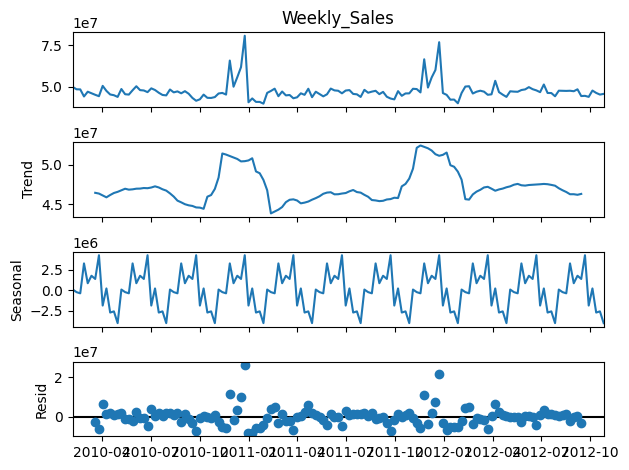

In [ ]:
print(sales_decomposition.plot())

Figure(640x480)


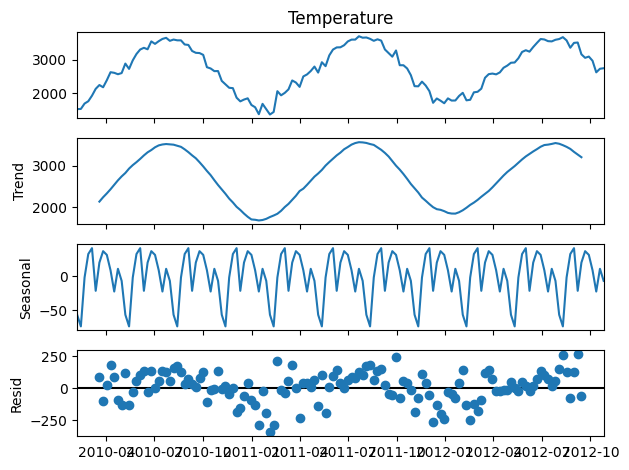

In [ ]:
print(temparature_decompostion.plot())

Regarding the sale and temperature  visualization the trend showing that the month of february,september,november,december are having holiday so for this reason for this the
sales are high rather than the other month of the year,and a trend is showing from year 2010 to 2012 a great decressing sales.
In the Weekly Sales Data, there is a noticeable increase in sales starting from September 2010, followed by a seasonal upward trend until January 2011. Afterward, the sales stabilize, eventually transitioning to a downward trend. This pattern is repeated from September 2011 to January 2012.
In summary, there appears to be an inverse relationship between Temperature and Weekly Sales. When temperatures decrease, weekly sales tend to rise, and vice versa.

## Does temperature affect the weekly sales in any manner?

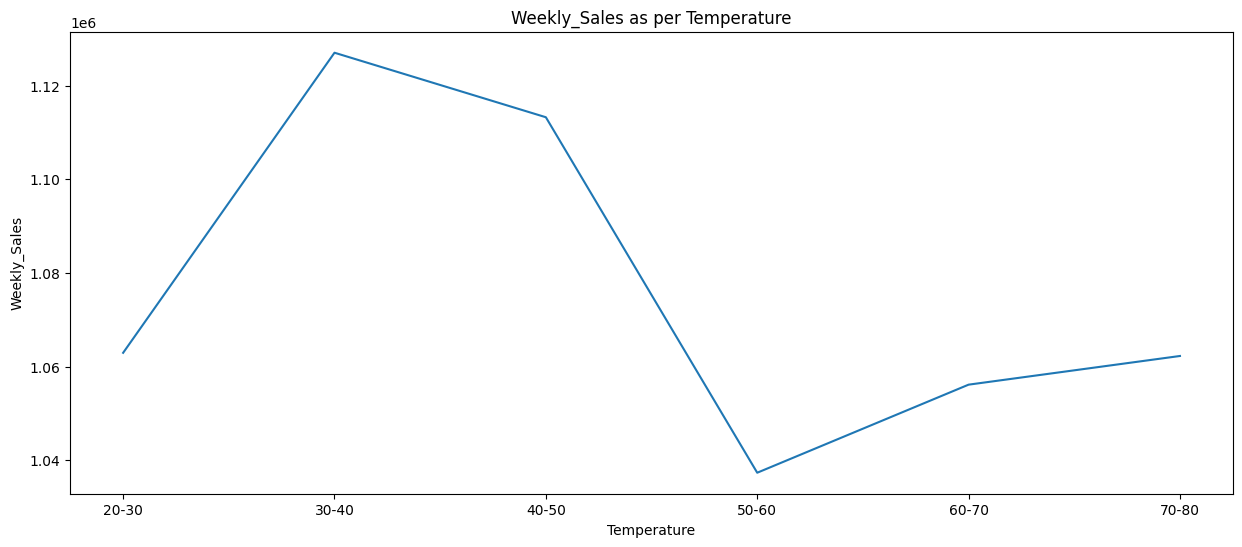

In [ ]:
# grouping the attribute of Temperature,Fuel_Price,CPI,Unemployment with the weekly sales and visualize this

plt.figure(figsize=(15,6))

#define the custom bins for the number of items and order placed
temp_bin = [20,30,40,50,60,70,80]
fuel_bin = [2.2,2.5,2.7,2.9,3.1,3.3,3.5,3.7,3.9,4.1,4.5]
cpi_bin = [125,155,185,200,215,230,245]
unemployment_bin = [3,5,7,9,11,13,15]

#labels of the bins
temp_label=["20-30","30-40","40-50","50-60","60-70","70-80"]
fuel_label=["2.2-2.5","2.5-2.7","2.7-2.9","2.9-3.1","3.1-3.3","3.3-3.5","3.5-3.7","3.7-3.9","3.9-4.1","4.1-4.5"]
cpi_label=["125-130","130-155","155-170","170-185","185-215","215-245"]
umemployment_label=["3-5","5-7","7-9","9-11","11-13","13-15"]

#place the features in specified interval
dataset["Temperature_range"] = pd.cut(dataset["Temperature"],bins=temp_bin,labels=temp_label,right= False)
dataset["Fuel_Price_range"] = pd.cut(dataset["Fuel_Price"],bins=fuel_bin,labels=fuel_label,right= False)
dataset["CPI_range"] = pd.cut(dataset["CPI"],bins=cpi_bin,labels=cpi_label,right= False)
dataset["Unemployment_range"] = pd.cut(dataset["Unemployment"],bins=unemployment_bin,labels=umemployment_label,right= False)

# grouped with weekly sale
grouped_temp=dataset.groupby("Temperature_range")["Weekly_Sales"].mean().reset_index()
grouped_fuel=dataset.groupby("Fuel_Price_range")["Weekly_Sales"].mean().reset_index()
grouped_cpi=dataset.groupby("CPI_range")["Weekly_Sales"].mean().reset_index()
grouped_employemnet=dataset.groupby("Unemployment_range")["Weekly_Sales"].mean().reset_index()

#visualization
sns.lineplot(x="Temperature_range",y="Weekly_Sales",data=grouped_temp)
plt.xlabel("Temperature")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per Temperature")
plt.show()


<Axes: >

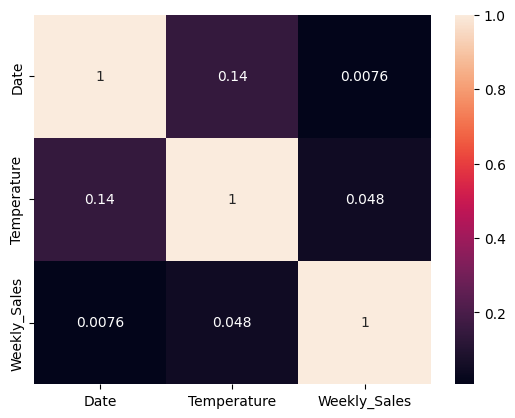

In [ ]:


temp_sales = dataset.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()
sales_correlation =temp_sales.corr()
sns.heatmap(sales_correlation,annot=True)




Yes as per upper visualization its cleary showing that the sale is effected by the temperatue.There is a nagatively correlation between the temperature and weekly sales.
Yes there is a Nagative correlation and the Temperature is affecting the Weekly Sales

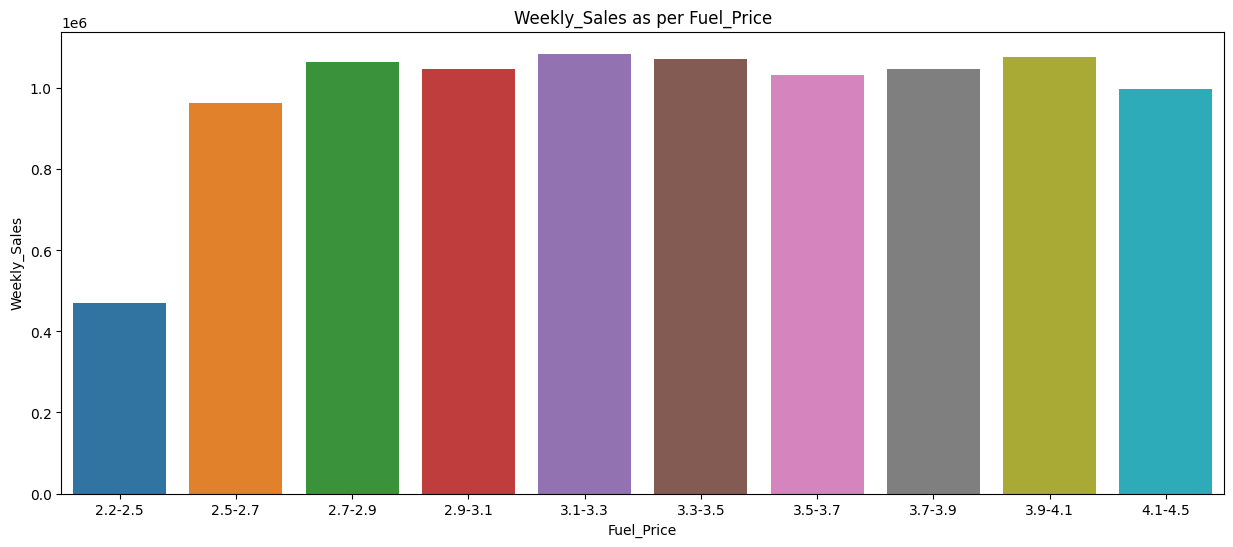

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="Fuel_Price_range",y="Weekly_Sales",data=grouped_fuel,hue="Fuel_Price_range")
plt.xlabel("Fuel_Price")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per Fuel_Price")
plt.show()

## How is the Consumer Price index affecting the weekly sales of various stores?

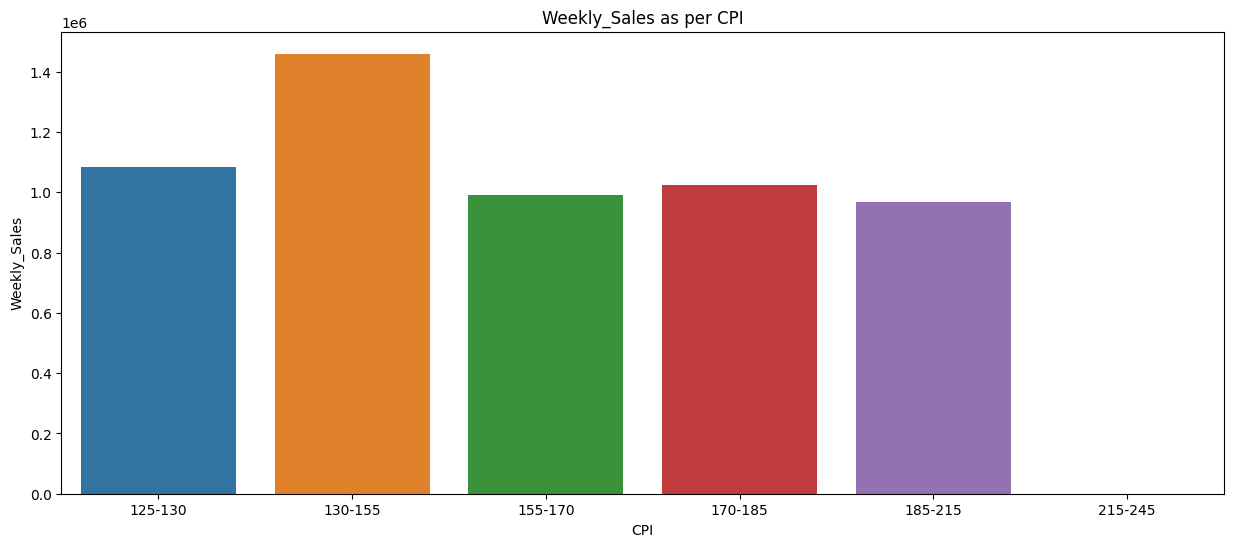

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="CPI_range",y="Weekly_Sales",data=grouped_cpi,hue="CPI_range")
plt.xlabel("CPI")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per CPI")
plt.show()

<Axes: >

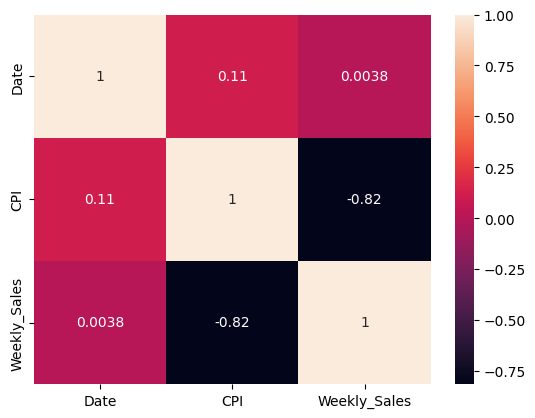

In [ ]:
cpi_sales = dataset.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()
cpi_sales_correlation =cpi_sales.corr()
sns.heatmap(cpi_sales_correlation,annot=True)

In [ ]:
cpi_sales_correlation=dataset["CPI"].corr(dataset["Weekly_Sales"])
print(f"The corelation between Weekly_Sales and CPI:{cpi_sales_correlation} ")

The corelation between Weekly_Sales and CPI:-0.07263416204017632 


There is a nagative correlation between the CPI and weekly sales. Below graph is also showing that when the CPI increasing the sales are down

In [ ]:
CPI_group = dataset.groupby("CPI_range")["Weekly_Sales"].mean().reset_index().sort_values(by="Weekly_Sales",ascending=False)
print(CPI_group)

  CPI_range  Weekly_Sales
1   130-155  1.459679e+06
0   125-130  1.082953e+06
3   170-185  1.023792e+06
2   155-170  9.894928e+05
4   185-215  9.685743e+05
5   215-245           NaN


### If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

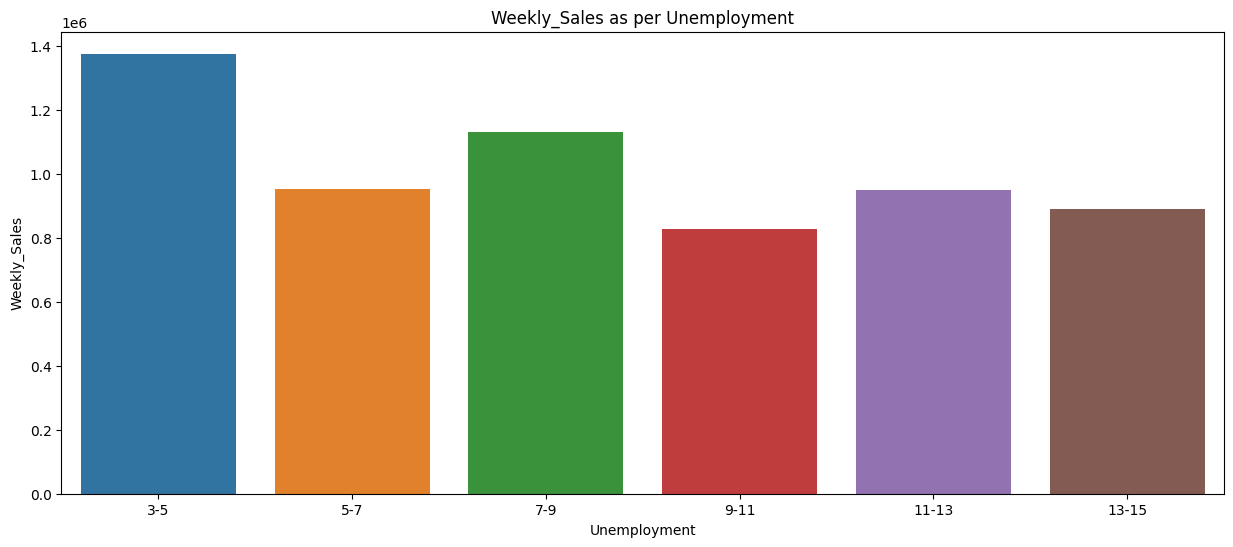

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="Unemployment_range",y="Weekly_Sales",data=grouped_employemnet,hue="Unemployment_range")
plt.xlabel("Unemployment")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per Unemployment")
plt.show()

In [ ]:
# As per visulazation maximum unemployment range 9-11 has low weekly sales
low_unemployemnet=dataset[dataset["Unemployment_range"]=="9-11"]
low_unemployemnet.groupby("Store")["Weekly_Sales"].mean().reset_index().sort_values(by="Weekly_Sales",ascending=True)

Store  Weekly_Sales
7      33  2.659757e+05
10     38  4.321988e+05
11     42  5.312102e+05
5      29  5.444613e+05
0       7  5.625530e+05
12     43  6.337549e+05
2      12  9.639242e+05
8      34  9.669910e+05
3      18  1.127760e+06
6      32  1.158930e+06
9      35  1.159017e+06
4      28  1.241575e+06
1      10  1.968171e+06

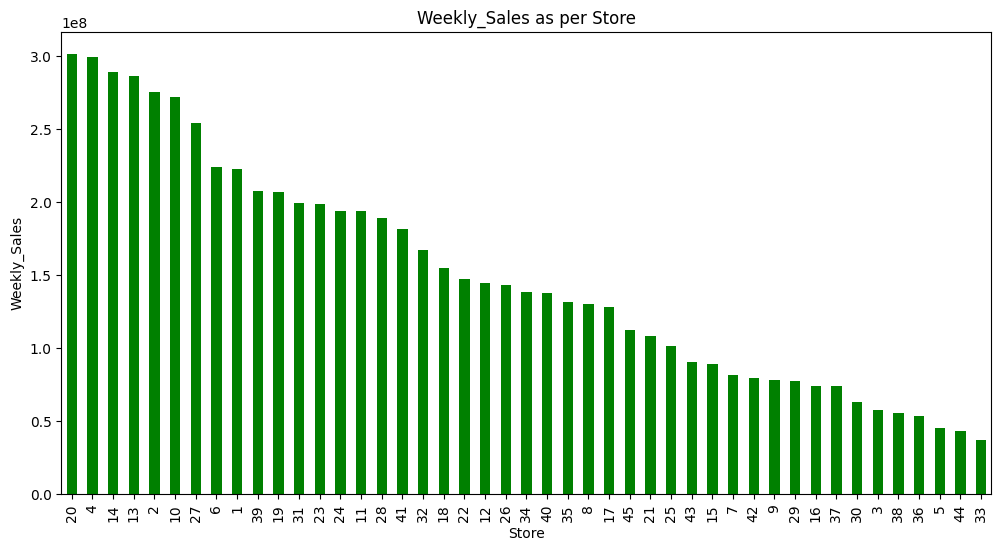

In [ ]:
# Store wise weekly sale
store_sale= dataset.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
store_sale.plot(kind="bar",color="green")
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")
plt.title("Weekly_Sales as per Store")
plt.show()


As per the record the most suffering store is store number 33 for the lowest average sales due to unemployment

### Top performing stores according to the historical data.

In [ ]:
dataset.head(10)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   
5      1 2010-03-12    1439541.59             0        57.79       2.667   
6      1 2010-03-19    1472515.79             0        54.58       2.720   
7      1 2010-03-26    1404429.92             0        51.45       2.732   
8      1 2010-04-02    1594968.28             0        62.27       2.719   
9      1 2010-04-09    1545418.53             0        65.86       2.770   

          CPI  Unemployment Temperature_range Fuel_Price_range CPI_range  \
0  211.096358         8.106             40-50          2.5-2.7   170-185   
1  211.242170         8.106             30-40          2.5-2.7   170-185   
2  211.289143         8.106             30-40          2.5-2.7   170-185   
3  211.319643         8.106             40-50          2.5-2.7   170-185   
4  211.350143         8.106             40-50          2.5-2.7   170-185   
5  211.380643         8.106             50-60          2.5-2.7   170-185   
6  211.215635         8.106             50-60          2.7-2.9   170-185   
7  211.018042         8.106             50-60          2.7-2.9   170-185   
8  210.820450         7.808             60-70          2.7-2.9   170-185   
9  210.622857         7.808             60-70          2.7-2.9   170-185   

  Unemployment_range  
0                7-9  
1                7-9  
2                7-9  
3                7-9  
4                7-9  
5                7-9  
6                7-9  
7                7-9  
8                7-9  
9                7-9

In [ ]:

for i in range(2010,2013):
    year = date_dataset[date_dataset["Year"]==i]
    if not  year.empty:
        top_store= year.groupby("Store")["Weekly_Sales"].sum().reset_index().sort_values(by="Weekly_Sales",ascending= False)
        top_store5=top_store.head(5).reset_index()
        print(f"Top performer of the year {i}:")
        print(f"Top 5 stores are:\n {top_store5[['Store','Weekly_Sales']]}")
        print("\n")




Top performer of the year 2010:
Top 5 stores are:
    Store  Weekly_Sales
0     14  1.054622e+08
1     20  1.017331e+08
2      4  9.568047e+07
3      2  9.527786e+07
4     13  9.527274e+07


Top performer of the year 2011:
Top 5 stores are:
    Store  Weekly_Sales
0      4  1.110923e+08
1     20  1.098370e+08
2     14  1.060963e+08
3     13  1.045375e+08
4     10  9.891689e+07


Top performer of the year 2012:
Top 5 stores are:
    Store  Weekly_Sales
0      4   92771189.24
1     20   89827709.38
2     13   86707455.02
3      2   81496695.37
4     10   78228616.94





As per the data the top performance stores in 2010 is store 14,in 2011 is store 4 ,and in 2012 is store 4


In [ ]:
for i in range(2010, 2013):
    year = date_dataset[date_dataset["Year"] == i]
    if not year.empty:
        bottom_store = year.groupby("Store")["Weekly_Sales"].sum().reset_index().sort_values(by="Weekly_Sales", ascending=True)
        bottom_store5 = bottom_store.head(5)
        print(f"Worst performer of the year {i}:")
        print(f"Worst 5 stores are:\n {bottom_store5[['Store', 'Weekly_Sales']]}")
        print("\n")


Worst performer of the year 2010:
Worst 5 stores are:
     Store  Weekly_Sales
32     33   12766834.26
43     44   13607519.45
4       5   14836030.77
37     38   16587794.52
2       3   18745419.00


Worst performer of the year 2011:
Worst 5 stores are:
     Store  Weekly_Sales
32     33   12957836.67
43     44   15498194.67
4       5   16470820.00
35     36   18972618.75
37     38   19940758.45


Worst performer of the year 2012:
Worst 5 stores are:
     Store  Weekly_Sales
32     33   11435551.03
35     36   13286470.53
4       5   14168838.13
43     44   14187373.72
2       3   18024439.50




### As per the data the worst  performance store is store number 33 in all the year of 2010,2011,2012



### how significant is the difference between the highest and lowest performing stores?

In [ ]:
for i in range(2010,2013):

    year = date_dataset[date_dataset["Year"]==i]
    if not  year.empty:
        top_store= year.groupby("Store")["Weekly_Sales"].sum().reset_index().sort_values(by="Weekly_Sales",ascending= False)
        bottom_store= year.groupby("Store")["Weekly_Sales"].sum().reset_index().sort_values(by="Weekly_Sales",ascending= True)
        top_store1=top_store.iloc[:1]
        bottom_store1=bottom_store.iloc[:1]
        top_diif_bottom = top_store1["Weekly_Sales"].values[0]-bottom_store1["Weekly_Sales"].values[0]
        print(f"In the year {i}:")
        print(f"The difference between top store and bottom store is : {top_diif_bottom}")
        print("\n")


In the year 2010:
The difference between top store and bottom store is : 92695408.11999999


In the year 2011:
The difference between top store and bottom store is : 98134456.66


In the year 2012:
The difference between top store and bottom store is : 81335638.21




## Use predictive modeling techniques to forecast the sales for each store for the next 12  weeks.

In [ ]:
date_dataset

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  Year  
0     211.096358         8.106      2  2010  
1     211.242170         8.106      2  2010  
2     211.289143         8.106      2  2010  
3     211.319643         8.106      2  2010  
4     211.350143         8.106      3  2010  
...          ...           ...    ...   ...  
6430  192.013558         8.684      9  2012  
6431  192.170412         8.667     10  2012  
6432  192.327265         8.667     10  2012  
6433  192.330854         8.667     10  2012  
6434  192.308899         8.667     10  2012  

[6435 rows x 10 columns]

In [ ]:
date_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int32         
 9   Year          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 452.6 KB


In [ ]:
# convert the data as weekly wise together
#date_dataset_week= date_dataset.drop(columns=["Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"])

date_dataset_week = date_dataset.groupby("Date")["Weekly_Sales"].sum().reset_index()

In [ ]:
#date_dataset_week.reset_index()
date_dataset_week.set_index("Date",inplace=True)
date_dataset_week

Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]

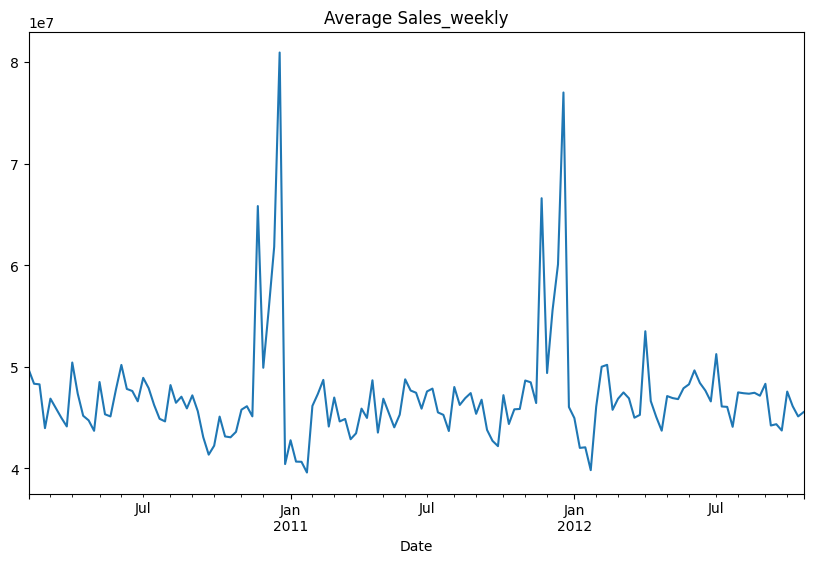

In [ ]:
plt.figure(figsize=(10,6))
date_dataset_week["Weekly_Sales"].plot()
plt.title("Average Sales_weekly")
plt.show()


In [ ]:
# check the data is stationary or not from Augumented - Dickey fuller test
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(date_dataset_week["Weekly_Sales"])
p_value = test_result[1]

if p_value<0.05:
    print("Data is stationary ")
else:
    print("Data is not stationary ")
p_value

Data is stationary 


2.675979158986003e-07

Figure(640x480)


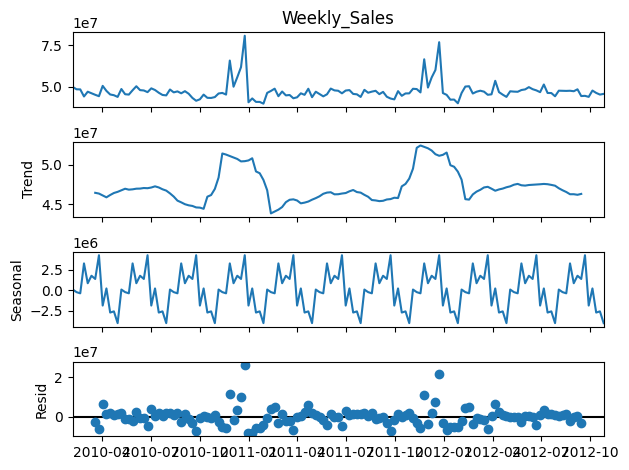

In [ ]:
# check as decomposed
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed= seasonal_decompose(date_dataset_week["Weekly_Sales"],period=13) # as the seasonal cycle goes on 13 week
print(decomposed.plot())

In [ ]:
#creating the rolling mean and standard deviation for smmothout shortterm fluctuation and identify trends in dataset over a moving window
mean_sales= date_dataset_week.rolling(window=12).mean() # create a rolliing mean
std_sales= date_dataset_week.rolling(window=12).std() # create a rolliing std

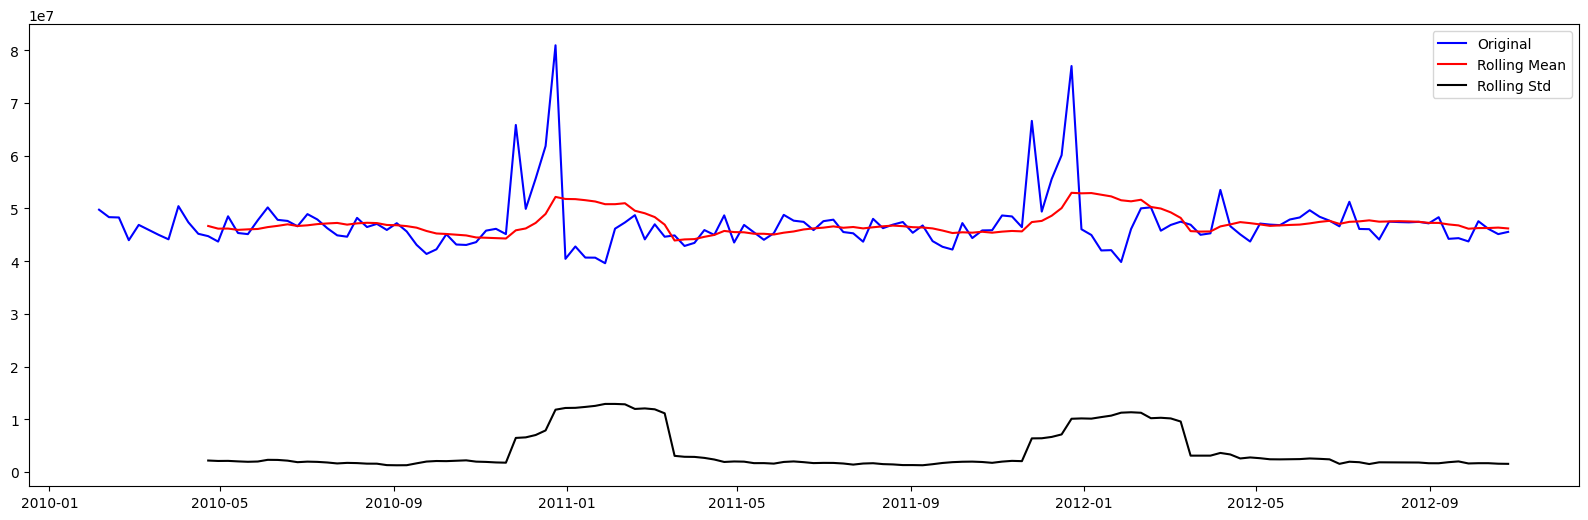

In [ ]:
# ploting the rolling mean and std
plt.figure(figsize=(20,6))
original= plt.plot(date_dataset_week['Weekly_Sales'],label="Original",color="blue")
mean= plt.plot(mean_sales,label="Rolling Mean",color='red')
std=plt.plot(std_sales,label="Rolling Std",color='black')
plt.legend(loc="best")
plt.show()

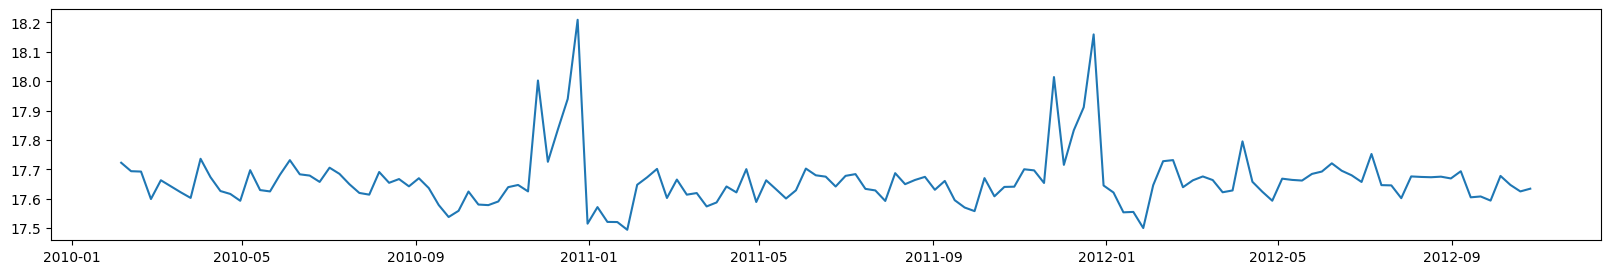

In [ ]:
# to see the log transformation when the data normalize
sale_log= np.log(date_dataset_week["Weekly_Sales"])
plt.figure(figsize=(20,3))
plt.plot(sale_log)

In [ ]:
sale_log

Date
2010-02-05    17.722536
2010-02-12    17.693701
2010-02-19    17.692466
2010-02-26    17.598986
2010-03-05    17.662920
                ...    
2012-09-28    17.593657
2012-10-05    17.677642
2012-10-12    17.646942
2012-10-19    17.624890
2012-10-26    17.634192
Name: Weekly_Sales, Length: 143, dtype: float64

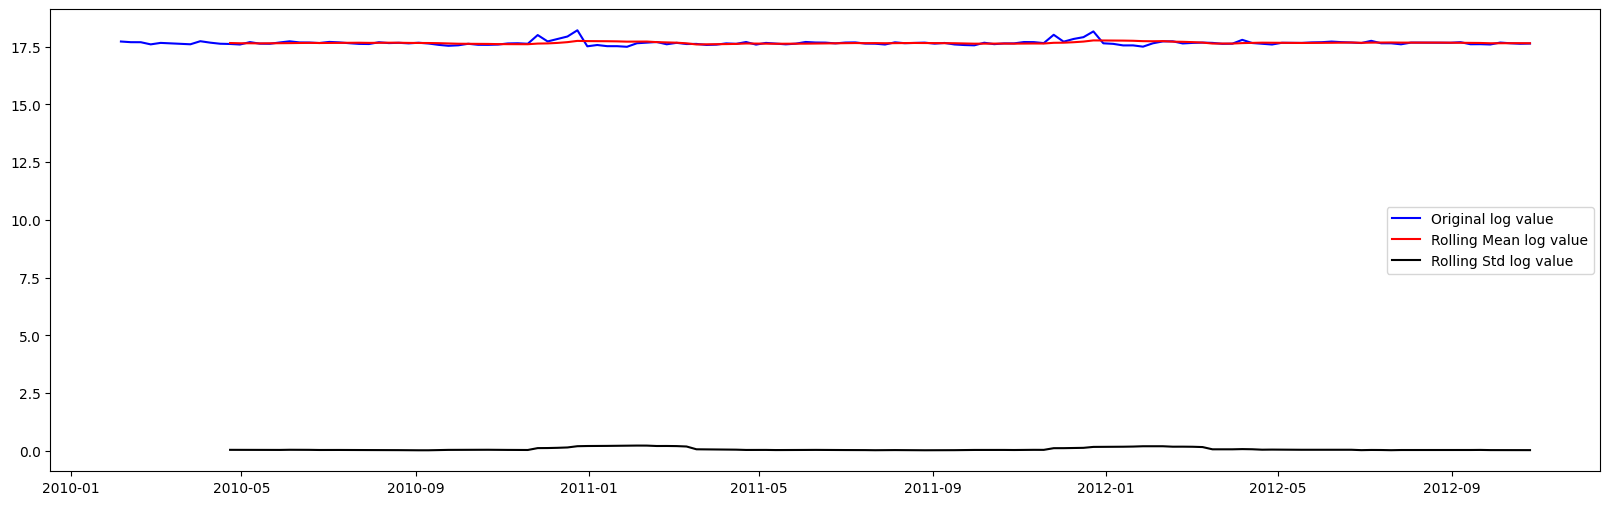

In [ ]:
# after the log transformation when we calculate the rolling mean and std
mean_sales_log= sale_log.rolling(window=12).mean()
std_sales_log= sale_log.rolling(window=12).std()
plt.figure(figsize=(20,6))
original= plt.plot(sale_log,label="Original log value",color="blue")
mean= plt.plot(mean_sales_log,label="Rolling Mean log value",color='red')
std=plt.plot(std_sales_log,label="Rolling Std log value",color='black')
plt.legend(loc="best")
plt.show()

In [ ]:
# to stabilize the variance subtract the log data with the mean log it is common need for time series analysis

sale_log_new= sale_log-mean_sales_log
sale_log_new

Date
2010-02-05         NaN
2010-02-12         NaN
2010-02-19         NaN
2010-02-26         NaN
2010-03-05         NaN
                ...   
2012-09-28   -0.053088
2012-10-05    0.028287
2012-10-12   -0.002538
2012-10-19   -0.026506
2012-10-26   -0.013724
Name: Weekly_Sales, Length: 143, dtype: float64

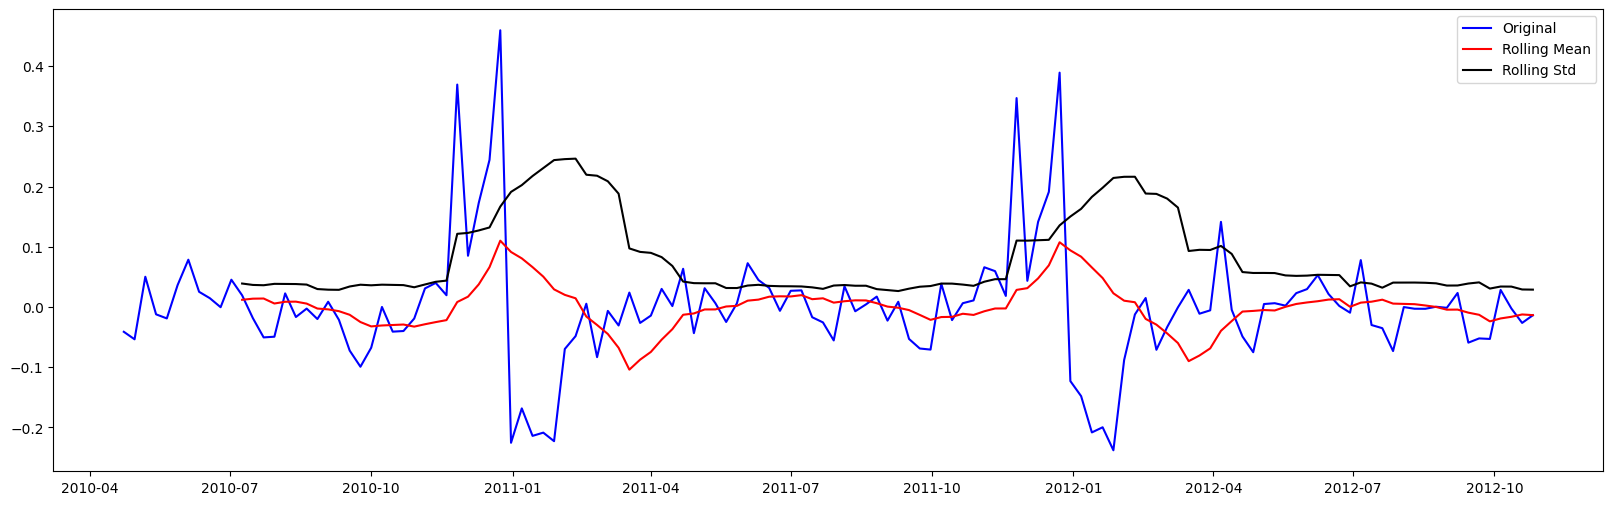

In [ ]:
#drop the nan values and plot again the rooling mean  and std
sale_log_new.dropna(inplace=True)
mean2= sale_log_new.rolling(window=12).mean()
std2= sale_log_new.rolling(window=12).std()

plt.figure(figsize=(20,6))
plt.plot(sale_log_new,label="Original",color="blue")
plt.plot(mean2,label="Rolling Mean",color='red')
plt.plot(std2,label="Rolling Std",color='black')
plt.legend(loc="best")
plt.show()


In [ ]:
# check the data is stationary or not from Augumented - Dickey fuller test
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(sale_log_new)
p_value = test_result[1]

if p_value<0.05:
    print("Data is stationary ")
else:
    print("Data is not stationary ")
p_value

Data is stationary 


2.7372369533979222e-08

In [ ]:
# splitting the data
train= sale_log_new.iloc[:int(0.7*len(sale_log_new))]
test= sale_log_new.iloc[int(0.7*len(sale_log_new)):]

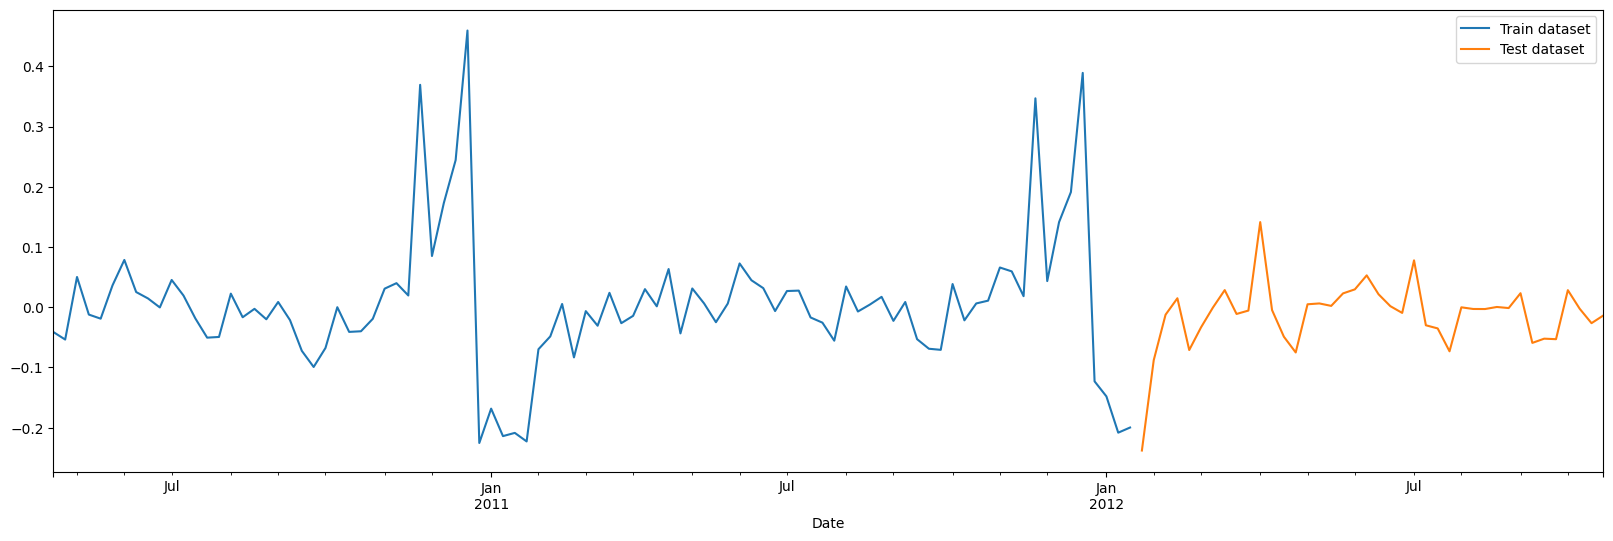

In [ ]:
#plot the train and test
plt.figure(figsize=(20,6))
train.plot(label="Train dataset")
test.plot(label="Test dataset")
plt.legend(loc="best")
plt.show()

In [ ]:
train


Date
2010-04-23   -0.041219
2010-04-30   -0.053701
2010-05-07    0.050178
2010-05-14   -0.012233
2010-05-21   -0.019031
                ...   
2011-12-23    0.389044
2011-12-30   -0.123084
2012-01-06   -0.148060
2012-01-13   -0.208306
2012-01-20   -0.199770
Name: Weekly_Sales, Length: 92, dtype: float64

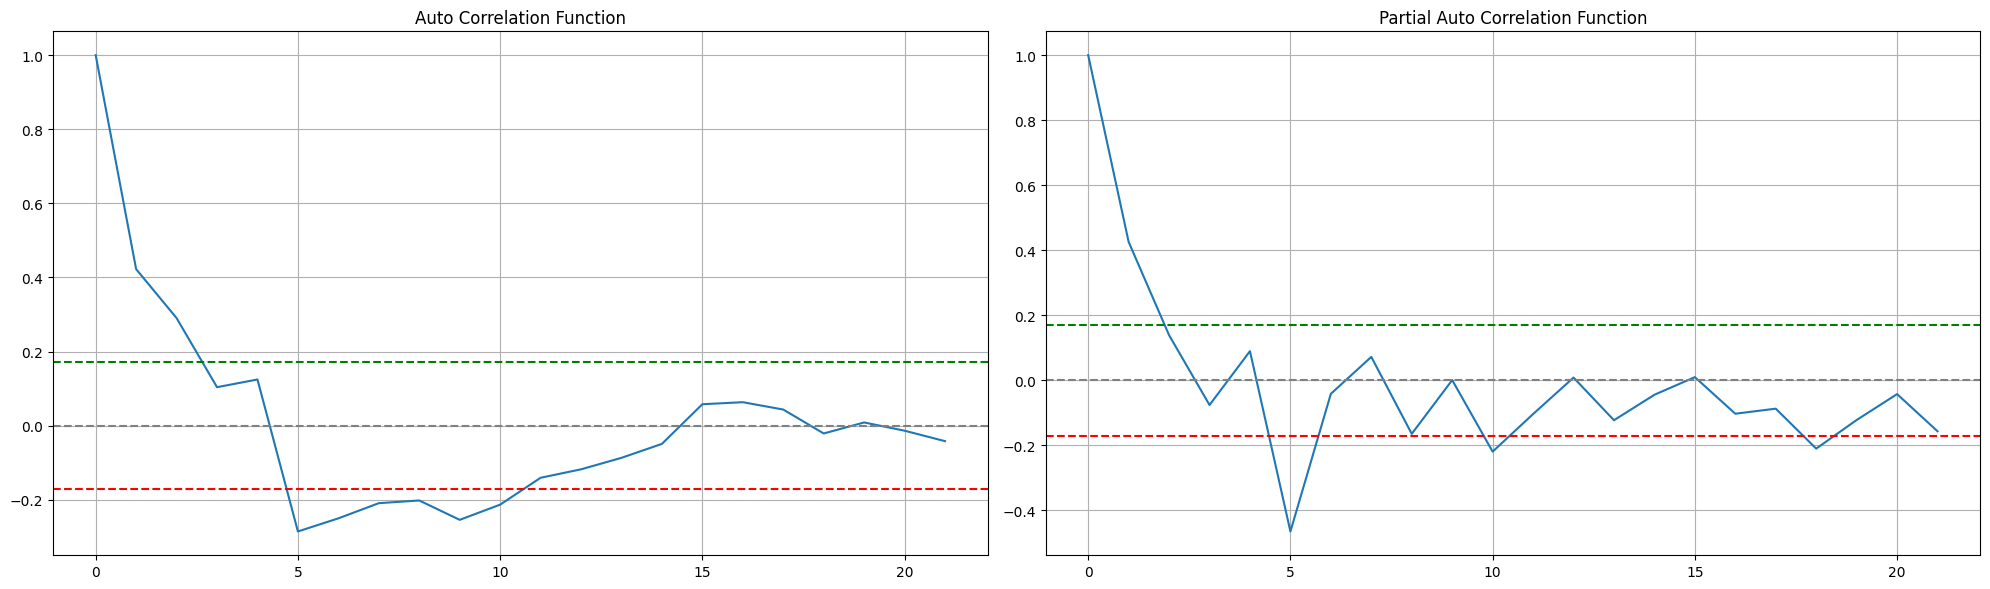

In [ ]:
#plotting the acf and pacf to identify p and q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(sale_log_new)
lag_pacf=pacf(sale_log_new)

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=-1.96/np.sqrt(len(sale_log_new)),linestyle="--",color="red")
plt.axhline(y=1.96/np.sqrt(len(sale_log_new)),linestyle="--",color="green")
plt.axhline(y=0,linestyle="--",color="gray")
plt.title("Auto Correlation Function")
plt.grid()
plt.tight_layout()


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=-1.96/np.sqrt(len(sale_log_new)),linestyle="--",color="red")
plt.axhline(y=1.96/np.sqrt(len(sale_log_new)),linestyle="--",color="green")
plt.axhline(y=0,linestyle="--",color="gray")
plt.title("Partial Auto Correlation Function")
plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
# to properly know the value of p d and q
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *
import itertools

p=range(0,5)
d=range(1,2)
q=range(0,5)

rmse=[]  # To store the rmse of multiple models with different different pdq
order1=[]  # to store the combinations of pdq

# Create different different combinations of pdq that you will try
pdq=list(itertools.product(p,d,q))
for i in pdq : # Built multiple models with different different pdq values
  model=ARIMA(train , order=i)
  model_fit = model.fit()
  pred=model_fit.predict(start=len(train) , end = len(train)+len(test)-1)
  order1.append(i)  # in list append the combination of pdq
  error = np.sqrt(mean_squared_error(test , pred))
  rmse.append(error)

result = pd.DataFrame(index=order1 , data =rmse , columns=["RMSE"])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [ ]:
result.sort_values(by="RMSE",ascending=True)

RMSE
(2, 1, 2)  0.043900
(1, 1, 3)  0.044732
(4, 1, 4)  0.045018
(2, 1, 1)  0.045517
(4, 1, 3)  0.046011
(0, 1, 3)  0.049193
(2, 1, 3)  0.053801
(1, 1, 1)  0.160775
(0, 1, 2)  0.162669
(0, 1, 1)  0.164070
(3, 1, 0)  0.183428
(1, 1, 2)  0.187661
(2, 1, 0)  0.194159
(0, 1, 0)  0.195436
(1, 1, 0)  0.197765
(3, 1, 1)  0.211150
(4, 1, 2)  0.212082
(3, 1, 3)  0.214848
(3, 1, 2)  0.227039
(2, 1, 4)  0.238736
(3, 1, 4)  0.239813
(1, 1, 4)  0.308719
(4, 1, 1)  0.314593
(4, 1, 0)  0.348443
(0, 1, 4)  0.351752

In [ ]:
p=range(0,10)
d=range(1,2)
q=range(0,10)

rmse=[]  # To store the rmse of multiple models with different different pdq
order1=[]  # to store the combinations of pdq

# Create different different combinations of pdq that you will try
pdq=list(itertools.product(p,d,q))
for i in pdq : # Built multiple models with different different pdq values
  model=ARIMA(train , order=i)
  model_fit = model.fit()
  pred=model_fit.predict(start=len(train) , end = len(train)+len(test)-1)
  order1.append(i)  # in list append the combination of pdq
  error = np.sqrt(mean_squared_error(test , pred))
  rmse.append(error)

result1 = pd.DataFrame(index=order1 , data =rmse , columns=["RMSE"])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [ ]:
result1.sort_values(by="RMSE",ascending=True)

RMSE
(4, 1, 8)  0.040087
(3, 1, 8)  0.040294
(4, 1, 5)  0.040461
(5, 1, 5)  0.041367
(3, 1, 5)  0.041617
...             ...
(3, 1, 4)  0.239813
(1, 1, 4)  0.308719
(4, 1, 1)  0.314593
(4, 1, 0)  0.348443
(0, 1, 4)  0.351752

[100 rows x 1 columns]

### ARIMA

In [ ]:
# arima model
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(train,order=(4,1,8))
arima_result=arima.fit()
# prediction of test
prediction_arima= arima_result.predict(start=len(train) , end = len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


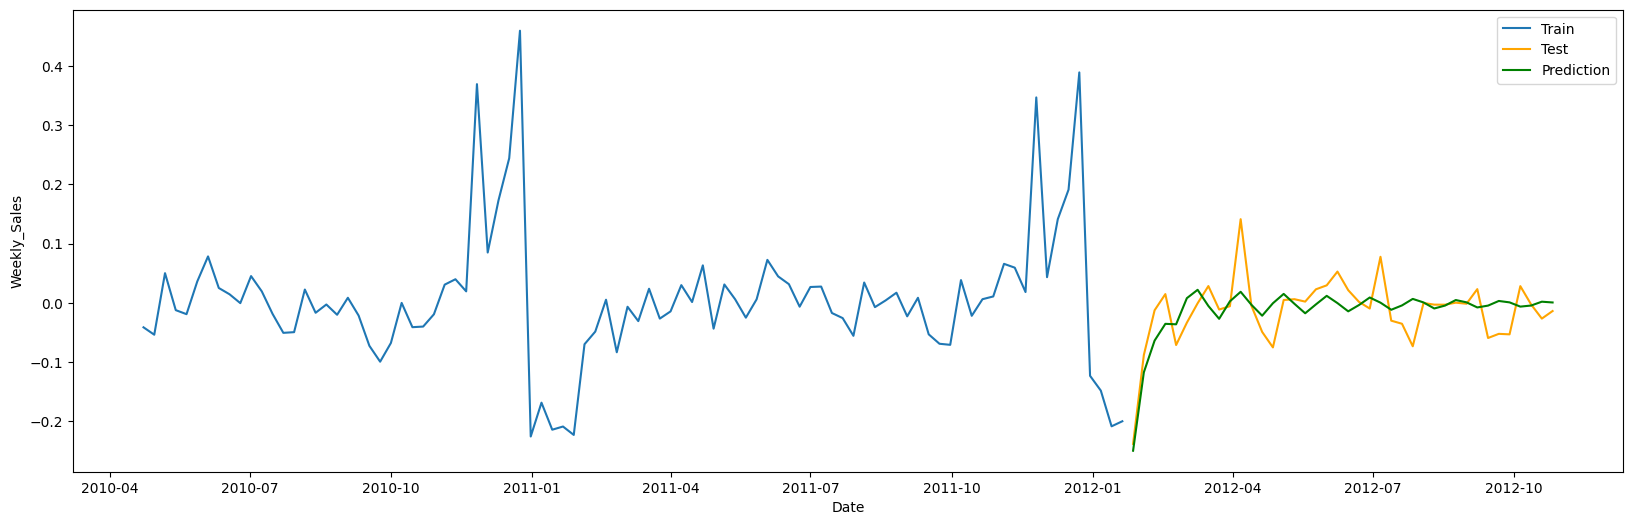

In [ ]:
#ploting the prediction and original
plt.figure(figsize=(20,6))
plt.plot(train,label="Train")
plt.plot(test,label="Test",color="orange")
plt.plot(prediction_arima,label="Prediction",color="green")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.show()

### SARIMA

In [ ]:
#predict with sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima= SARIMAX(train,order=(4,1,9),seasonal_order=(4,1,9,12))
sarima_result=sarima.fit()
# prediction of test
prediction_sarima= sarima_result.predict(start=len(train) , end = len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


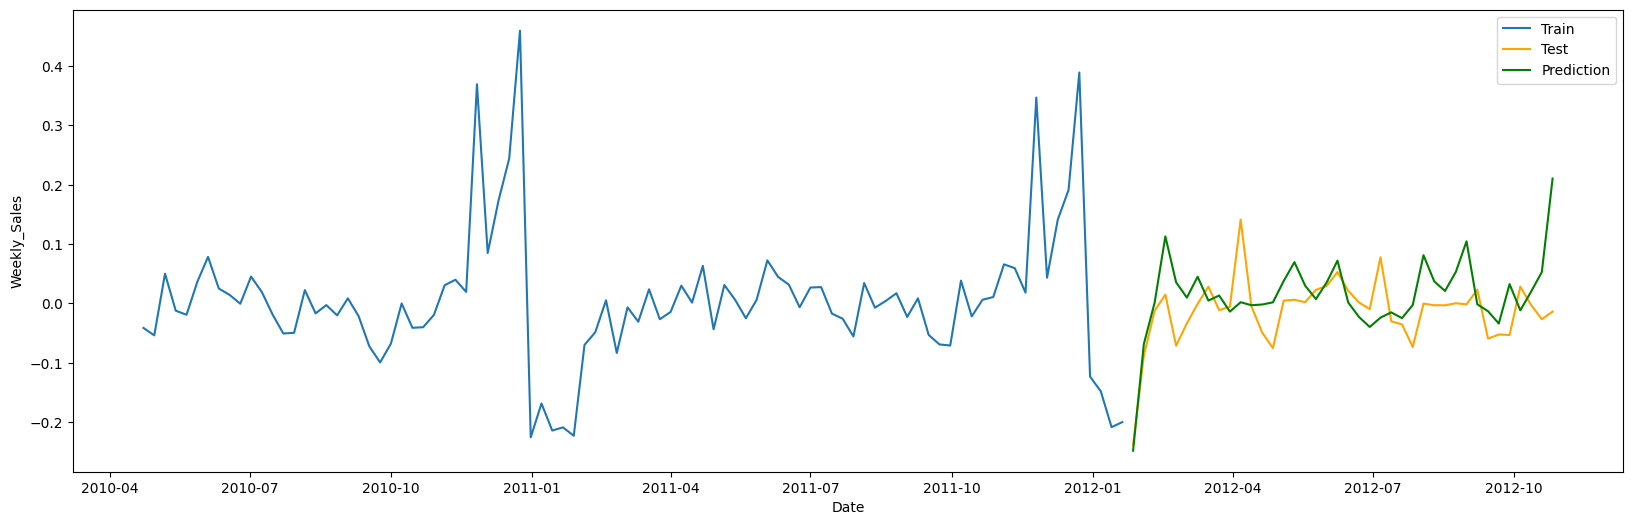

In [ ]:
#ploting the prediction and original
plt.figure(figsize=(20,6))
plt.plot(train,label="Train")
plt.plot(test,label="Test",color="orange")
plt.plot(prediction_sarima,label="Prediction",color="green")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.show()

In [ ]:
from sklearn.metrics import *
mse_arima= mean_squared_error(test,prediction_arima)
mse_sarima= mean_squared_error(test,prediction_sarima)
print(f"MSE of ARIMA:{mse_arima}")
print(f"MSE of SARIMA:{mse_sarima}")

rmse_arima= np.sqrt(mse_arima)
rmse_sarima= np.sqrt(mse_sarima)
print(f"RMSE of ARIMA:{rmse_arima}")
print(f"RMSE of SARIMA:{rmse_sarima}")

MSE of ARIMA:0.001606942369911029
MSE of SARIMA:0.004259718178508358
RMSE of ARIMA:0.04008668569376906
RMSE of SARIMA:0.06526651651887327


## Store -Wise Forcasting of next 12 weeks


In [ ]:
Store_dataset_week = date_dataset[["Date","Store","Weekly_Sales"]]
Store_dataset_week

Date  Store  Weekly_Sales
0    2010-02-05      1    1643690.90
1    2010-02-12      1    1641957.44
2    2010-02-19      1    1611968.17
3    2010-02-26      1    1409727.59
4    2010-03-05      1    1554806.68
...         ...    ...           ...
6430 2012-09-28     45     713173.95
6431 2012-10-05     45     733455.07
6432 2012-10-12     45     734464.36
6433 2012-10-19     45     718125.53
6434 2012-10-26     45     760281.43

[6435 rows x 3 columns]

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# create a function to forcast the sales in each store

def store_wise_prediction(df, store_num):
  # select the stores
  store_sales=df[df['Store']==store_num].groupby('Date')['Weekly_Sales'].sum().reset_index()
  store_sales.set_index("Date",inplace=True) # setting the date as index

  # rolling mean and rolling std calculate
  mean_roll= store_sales.rolling(window=12).mean()
  std_roll = store_sales.rolling(window=12).std()

  # log transformation
  store_sales_log= np.log(store_sales["Weekly_Sales"])

  # calculate the mean_log and std_log
  mean_roll_log= store_sales_log.rolling(window=12).mean()
  std_roll_log = store_sales_log.rolling(window=12).std()

  # subtract the log data with mean log
  store_sales_new= store_sales_log-mean_roll_log

  # drop the nan values
  store_sales_new.dropna(inplace=True)
   #  as already we have done the pdq which is best so we will appply this to get the  arima prediction
  arima=ARIMA(store_sales_new,order=(4,1,9))
  arima_result=arima.fit()
  # prediction of test
  predictions_arima= arima_result.predict()

  # as already we have done the pdq which is best so we will appply this to get the  sarima prediction
  sarima=SARIMAX(store_sales_new,order=(4,1,9),seasonal_order=(4,1,9,12))
  sarima_result=sarima.fit()
  predictions_sarima= sarima_result.predict()

# error prediction
  MSE_arima= mean_squared_error(store_sales_new,predictions_arima)
  MSE_sarima= mean_squared_error(store_sales_new,predictions_sarima)

  rmse_arima = np.sqrt(MSE_arima)
  rmse_sarima = np.sqrt(MSE_sarima)


  #forcast 12 weeks
  forecast_steps=12
  forecast_Arima = arima_result.forecast(steps=forecast_steps)
  forecast_Sarima = sarima_result.forecast(steps=forecast_steps)

#end date calculation
  end_date_actual_date="2012-10-26" # i will continue the date from here

  forecast_start_date= pd.to_datetime(end_date_actual_date) + pd.DateOffset(weeks=0)
  forecast_end_date=forecast_start_date+pd.DateOffset(weeks=len(forecast_Arima))
  forcast_dates=pd.date_range(start=forecast_start_date,end=forecast_end_date,freq="W")


# save in dataframe

  forecast_df = pd.DataFrame({"Date":forcast_dates,"Store":store_num,"Arima_Predicted_Weekly_Sales":forecast_Arima,"Sarima_Predicted_Weekly_Sales":forecast_Sarima})

  print(f"Store {store_num} - Best Model:\n Date={forecast_start_date} \n Rmse_arima:\n{rmse_arima}\n mse_arima:\n{MSE_arima}\n Rmse_sarima:\n{rmse_sarima}\n mse_sarima:\n{MSE_sarima}\n")
  print("\n")

  return forecast_df



In [ ]:
All_Store_forecast = pd.DataFrame()
for i in Store_dataset_week.Store.unique():
  forecast = store_wise_prediction(Store_dataset_week, i)
  All_Store_forecast = pd.concat([All_Store_forecast,forecast])



Store 1 - Best Model:
 Date=2012-10-26 00:00:00 
 Rmse_arima:
0.0762349752965283
 mse_arima:
0.005811771458462281
 Rmse_sarima:
0.08230835408509558
 mse_sarima:
0.006774665152197472



Store 2 - Best Model:
 Date=2012-10-26 00:00:00 
 Rmse_arima:
0.08188020704548815
 mse_arima:
0.006704368305812006
 Rmse_sarima:
0.0869898010087345
 mse_sarima:
0.007567225479539227



Store 3 - Best Model:
 Date=2012-10-26 00:00:00 
 Rmse_arima:
0.07714373898929937
 mse_arima:
0.0059511564652491465
 Rmse_sarima:
0.08778899414596093
 mse_sarima:
0.0077069074931595625



Store 4 - Best Model:
 Date=2012-10-26 00:00:00 
 Rmse_arima:
0.07975651439062538
 mse_arima:
0.006361101587742034
 Rmse_sarima:
0.08604575601283948
 mse_sarima:
0.007403872127821101



Store 5 - Best Model:
 Date=2012-10-26 00:00:00 
 Rmse_arima:
0.08469306009555888
 mse_arima:
0.007172914428349949
 Rmse_sarima:
0.09400795921646062
 mse_sarima:
0.008837496396043722



Store 6 - Best Model:
 Date=2012-10-26 00:00:00 
 Rmse_arima:
0.093338

In [ ]:
All_Store_forecast

Date  Store  Arima_Predicted_Weekly_Sales  \
2012-11-02 2012-10-28      1                      0.043361   
2012-11-09 2012-11-04      1                      0.016898   
2012-11-16 2012-11-11      1                     -0.038614   
2012-11-23 2012-11-18      1                     -0.003977   
2012-11-30 2012-11-25      1                      0.014721   
...               ...    ...                           ...   
2012-12-21 2012-12-16     45                      0.027715   
2012-12-28 2012-12-23     45                      0.005886   
2013-01-04 2012-12-30     45                     -0.028790   
2013-01-11 2013-01-06     45                     -0.017928   
2013-01-18 2013-01-13     45                      0.026577   

            Sarima_Predicted_Weekly_Sales  
2012-11-02                      -0.030252  
2012-11-09                       0.034275  
2012-11-16                       0.017360  
2012-11-23                       0.121121  
2012-11-30                       0.008667  
...                                   ...  
2012-12-21                       0.213692  
2012-12-28                      -0.011459  
2013-01-04                       0.080978  
2013-01-11                       0.129004  
2013-01-18                       0.334880  

[540 rows x 4 columns]

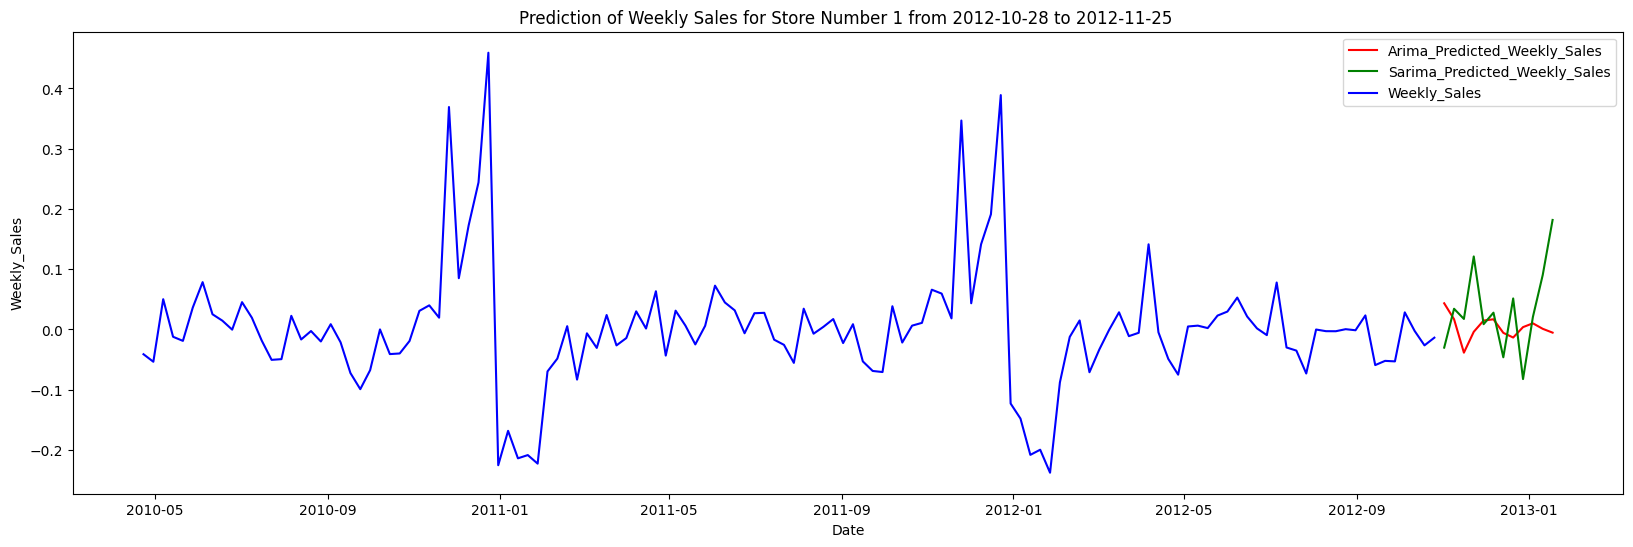

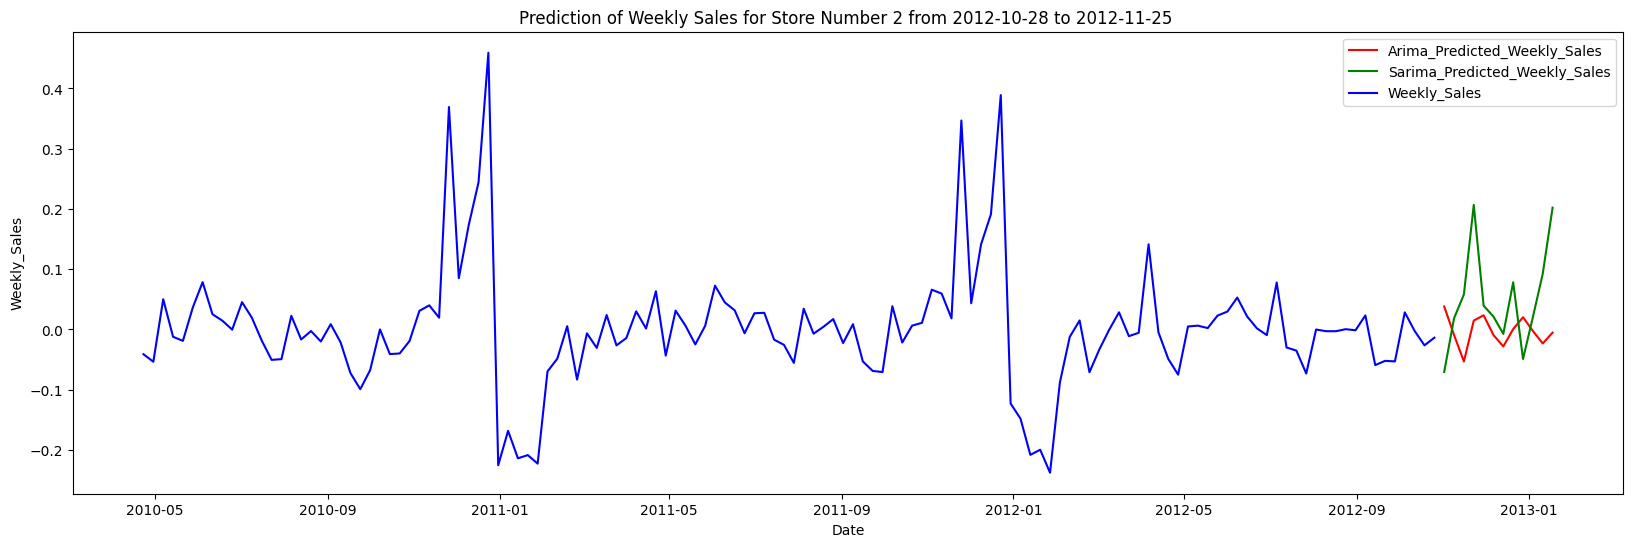

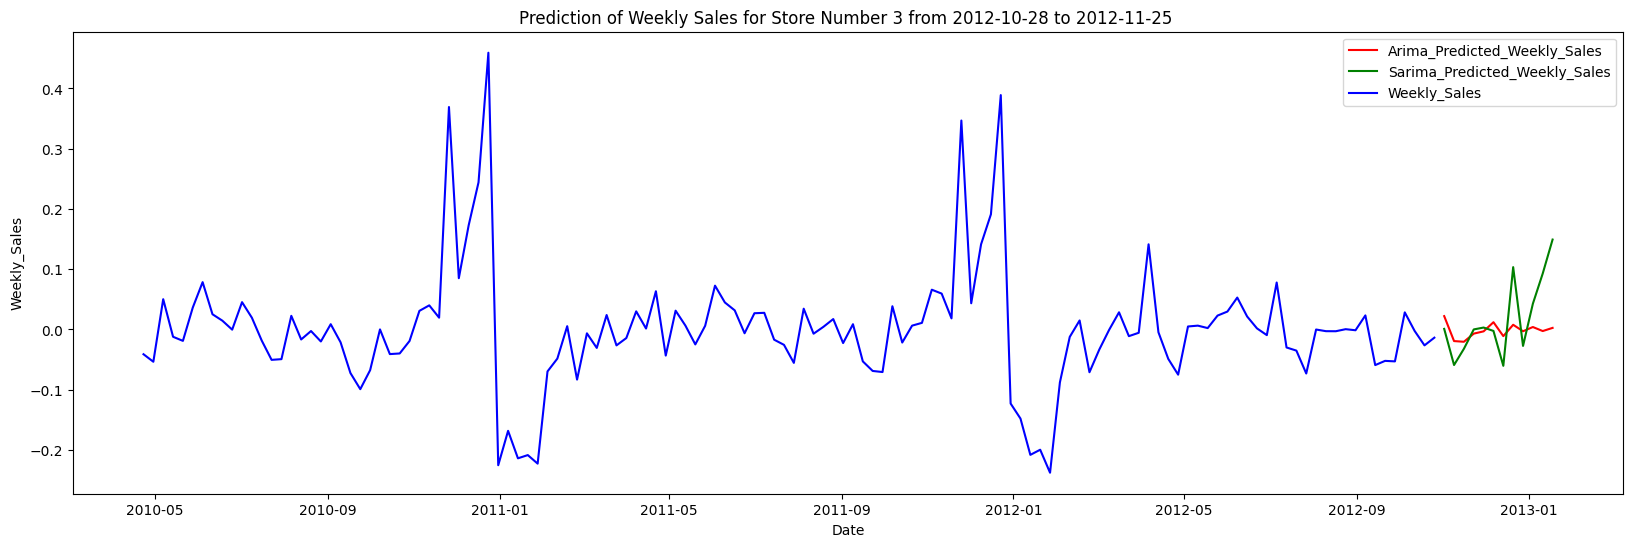

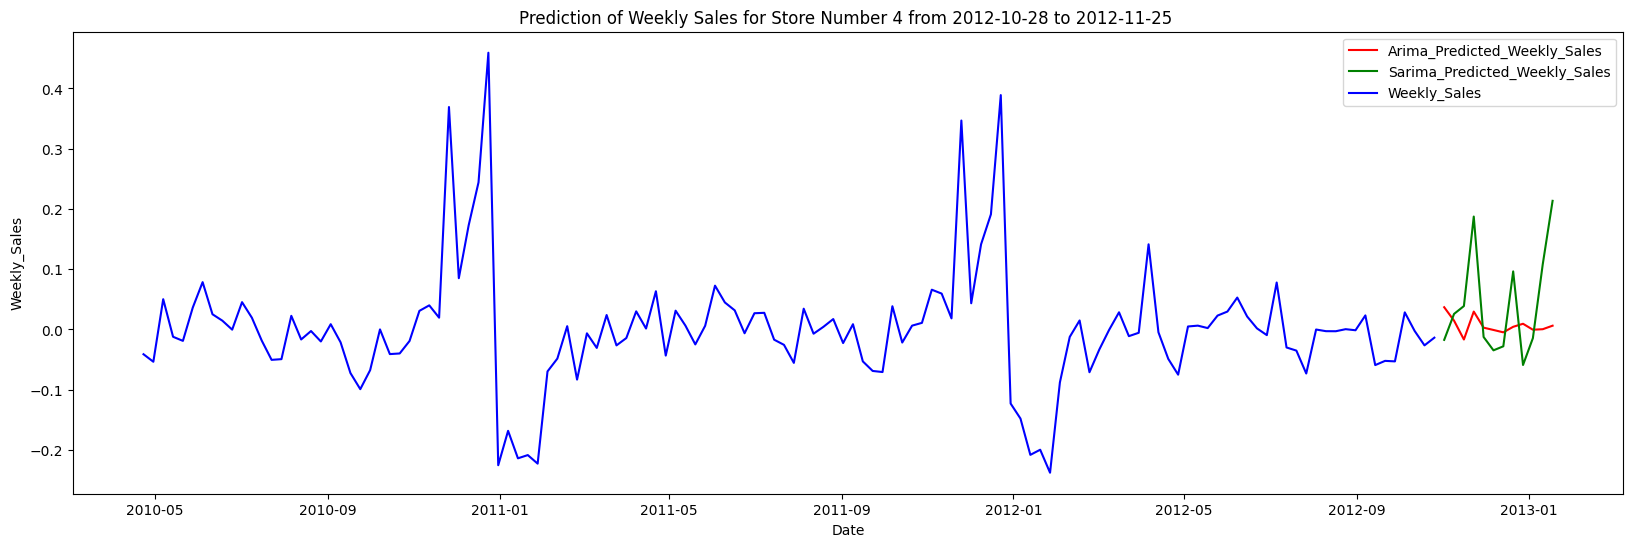

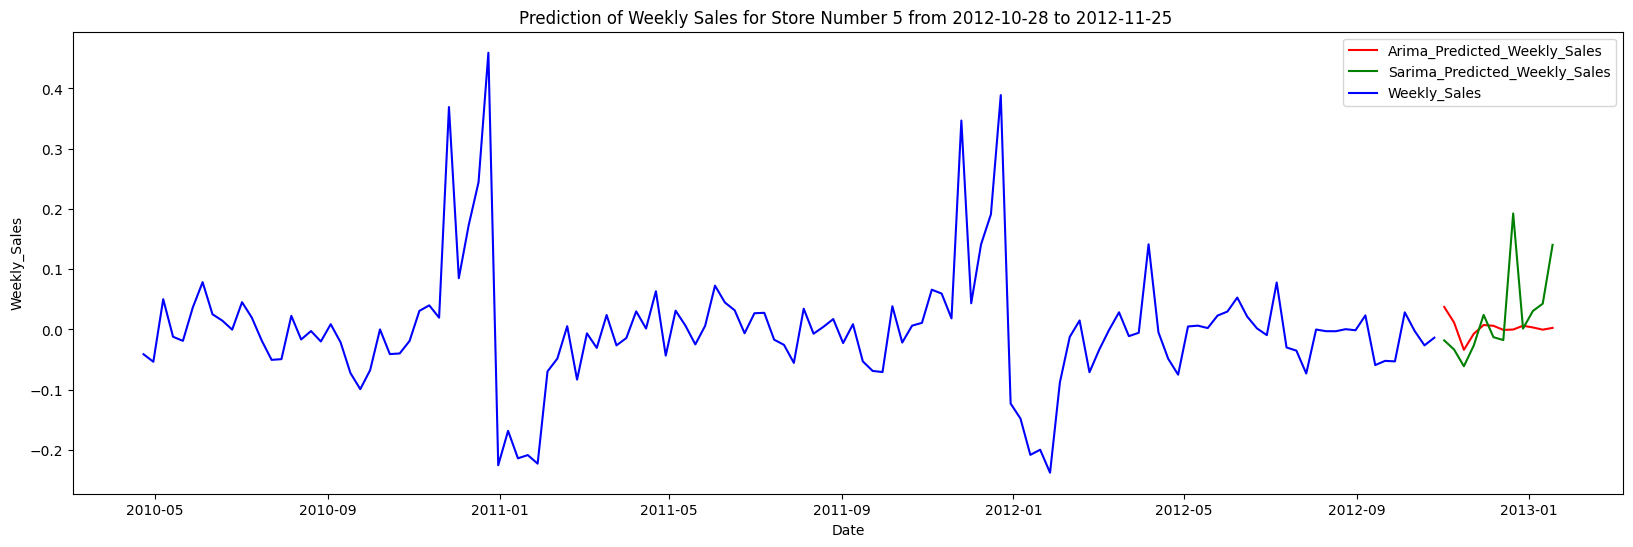

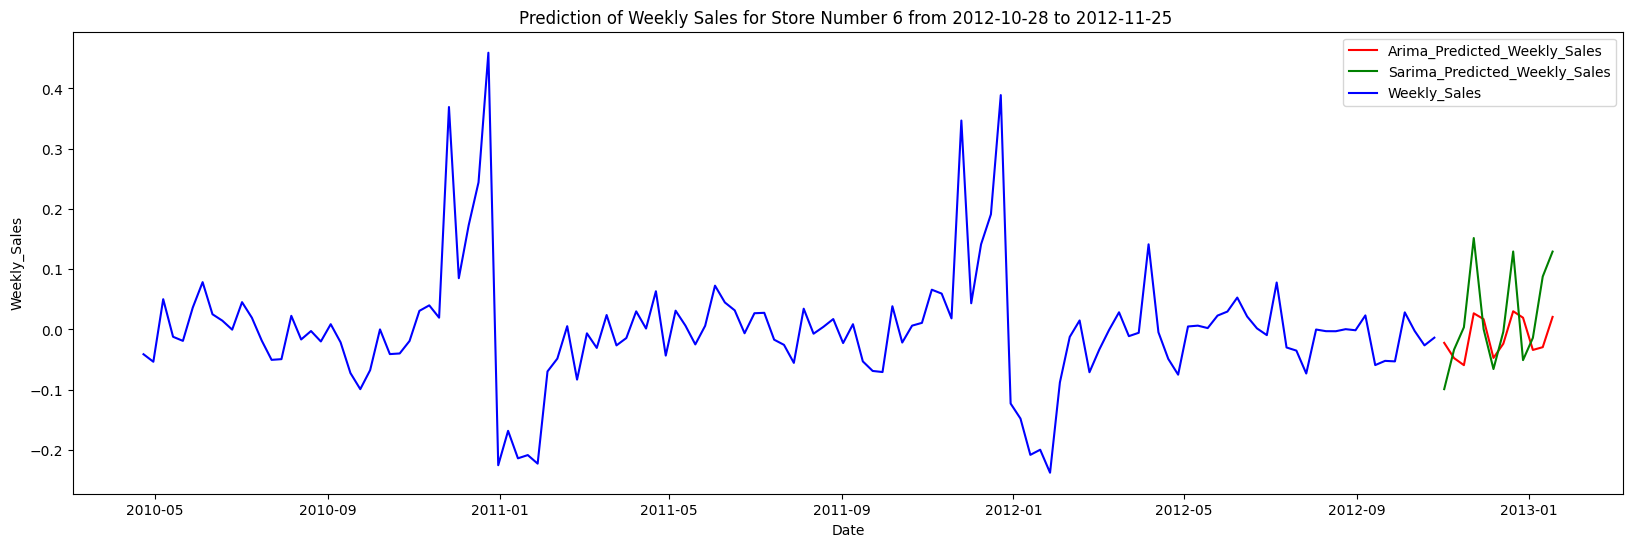

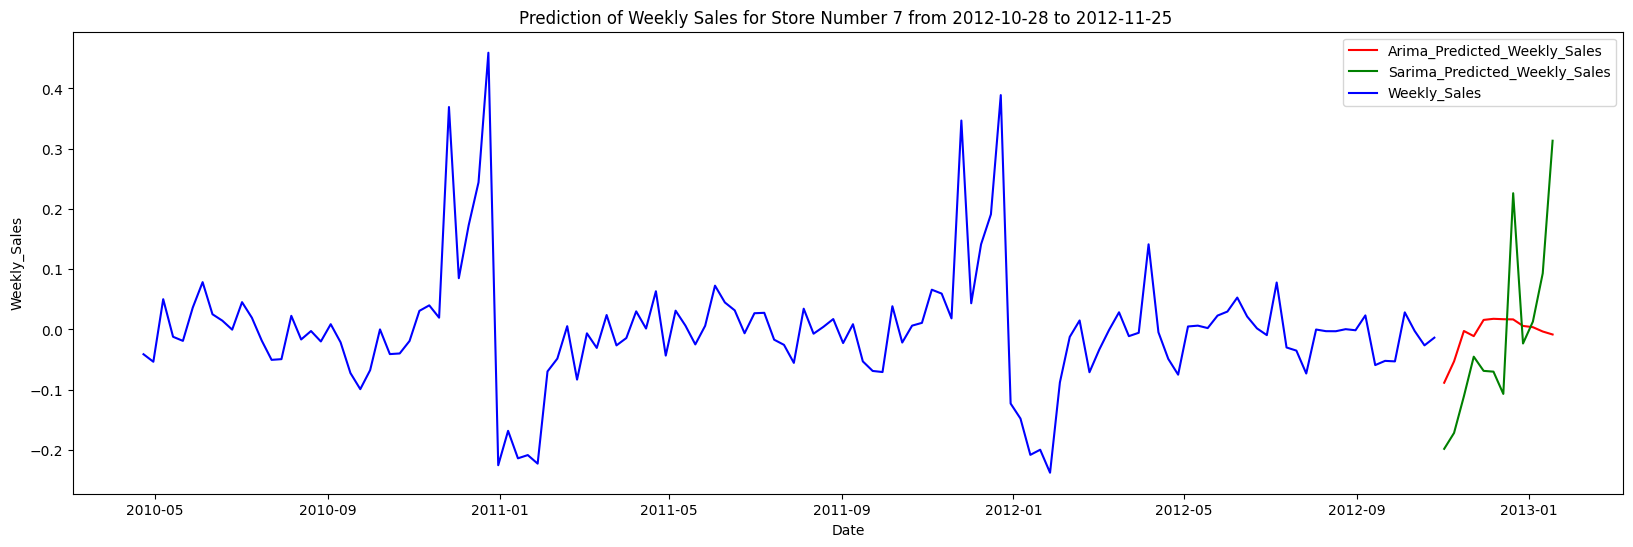

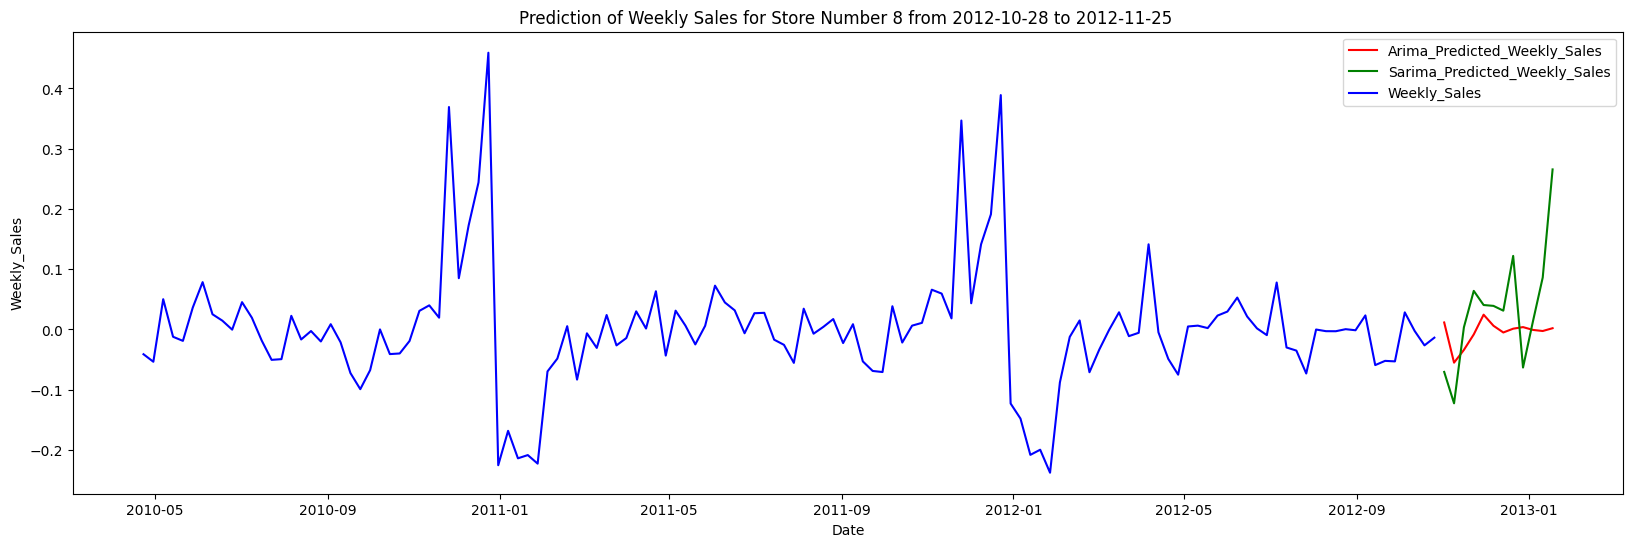

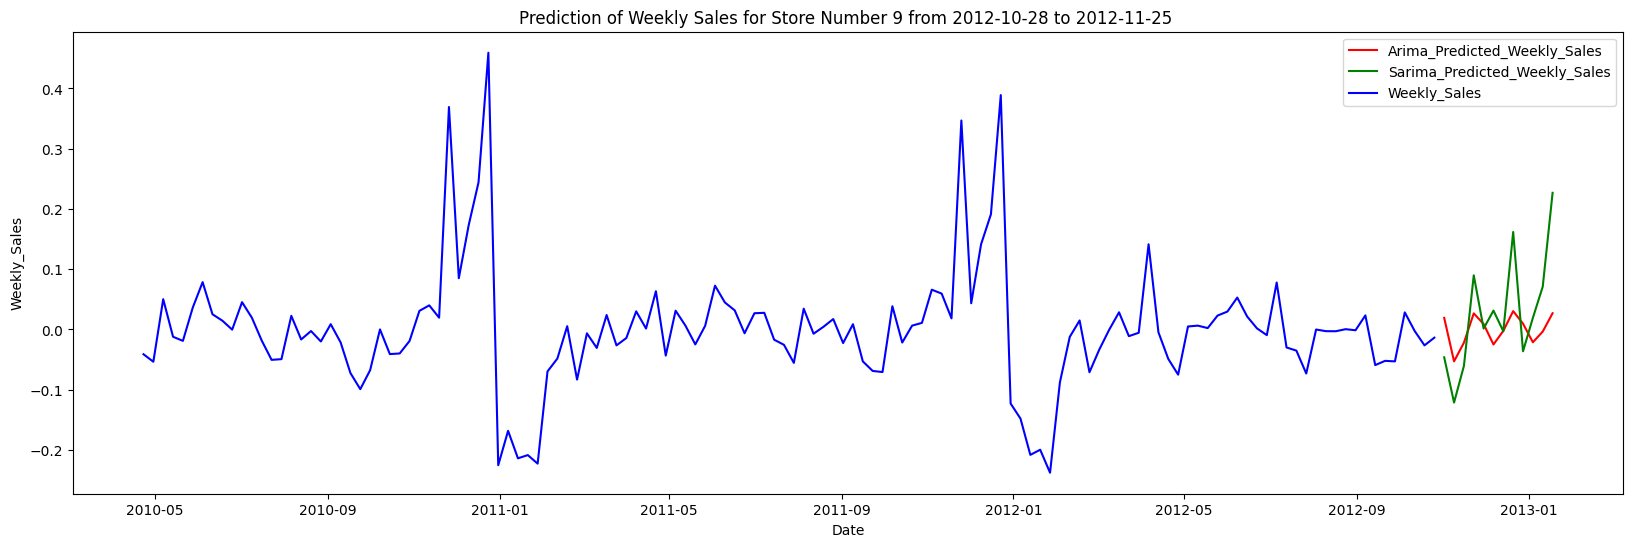

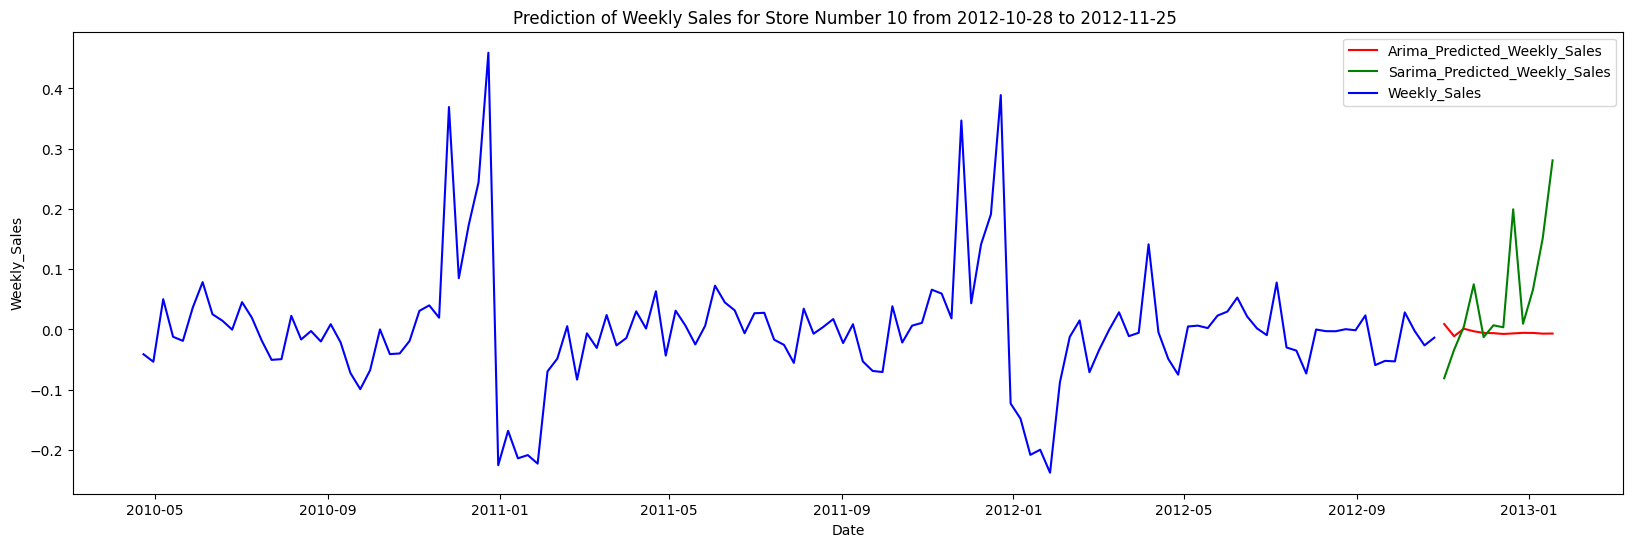

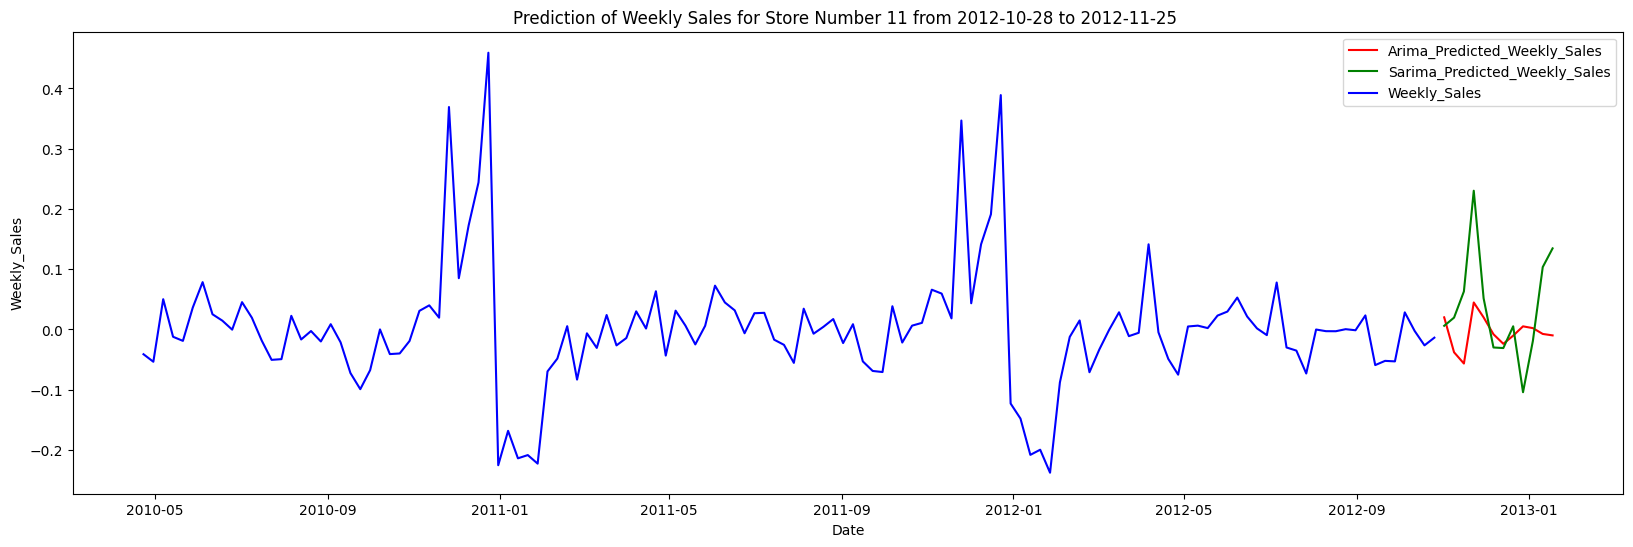

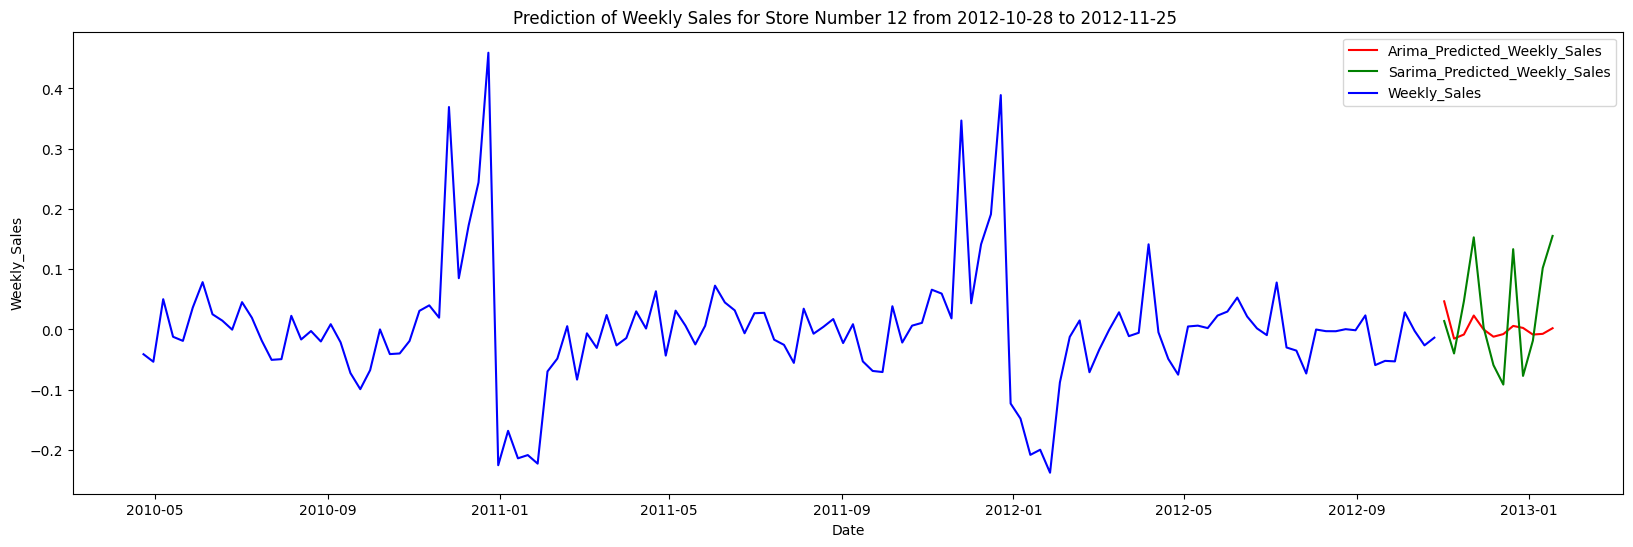

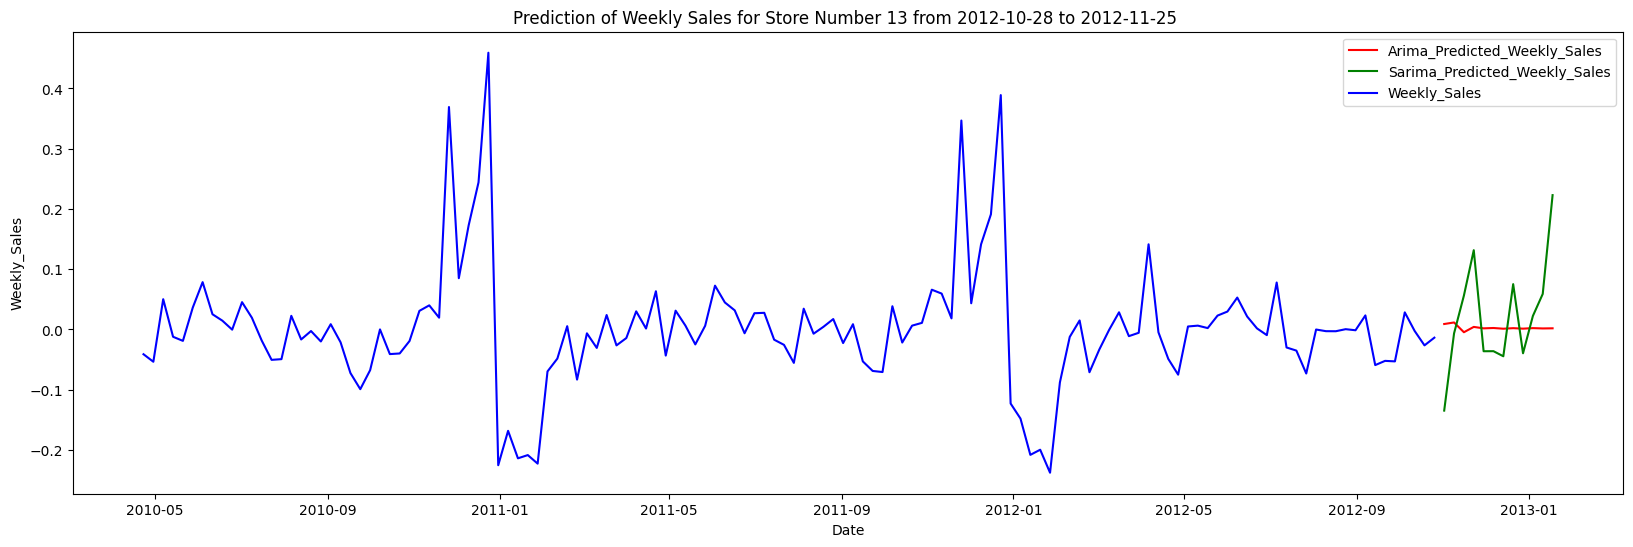

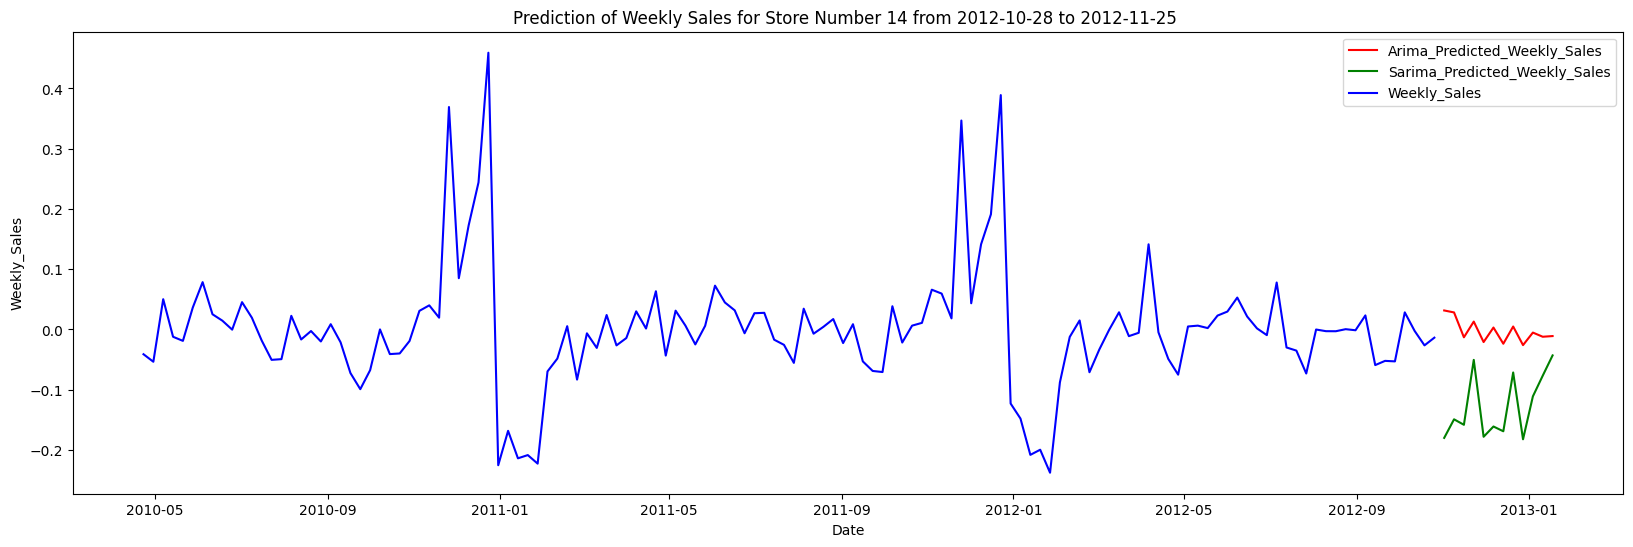

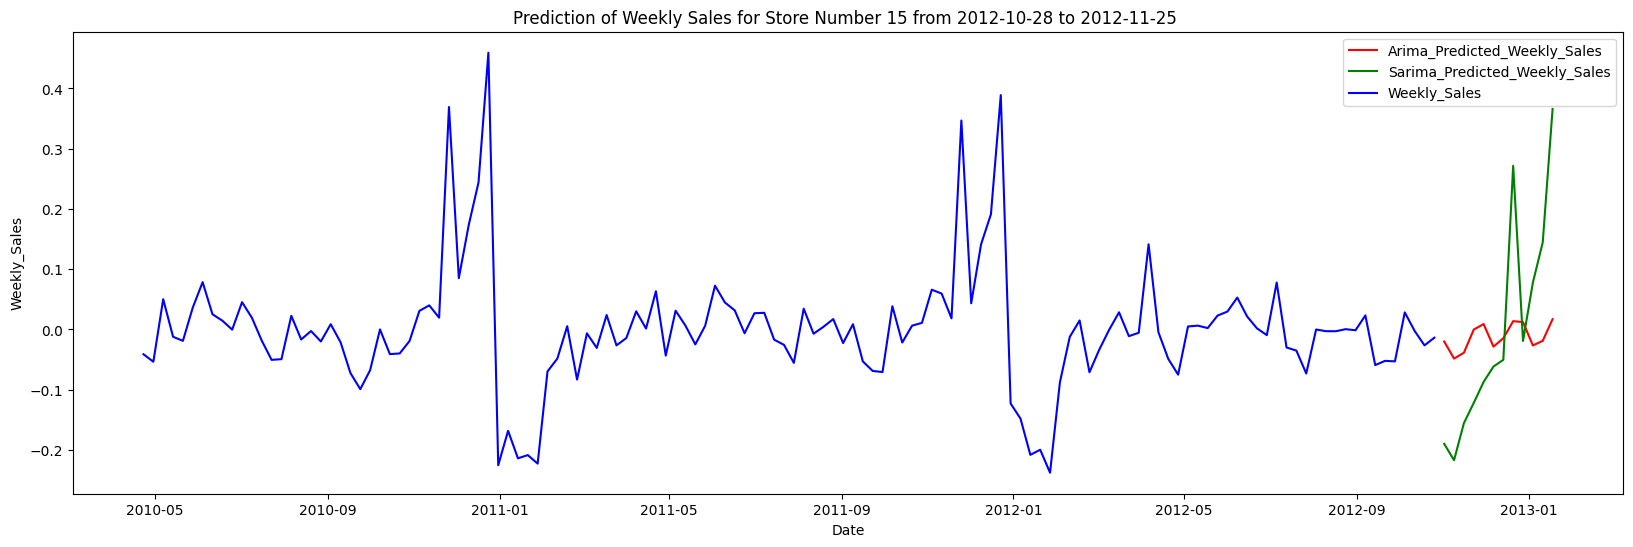

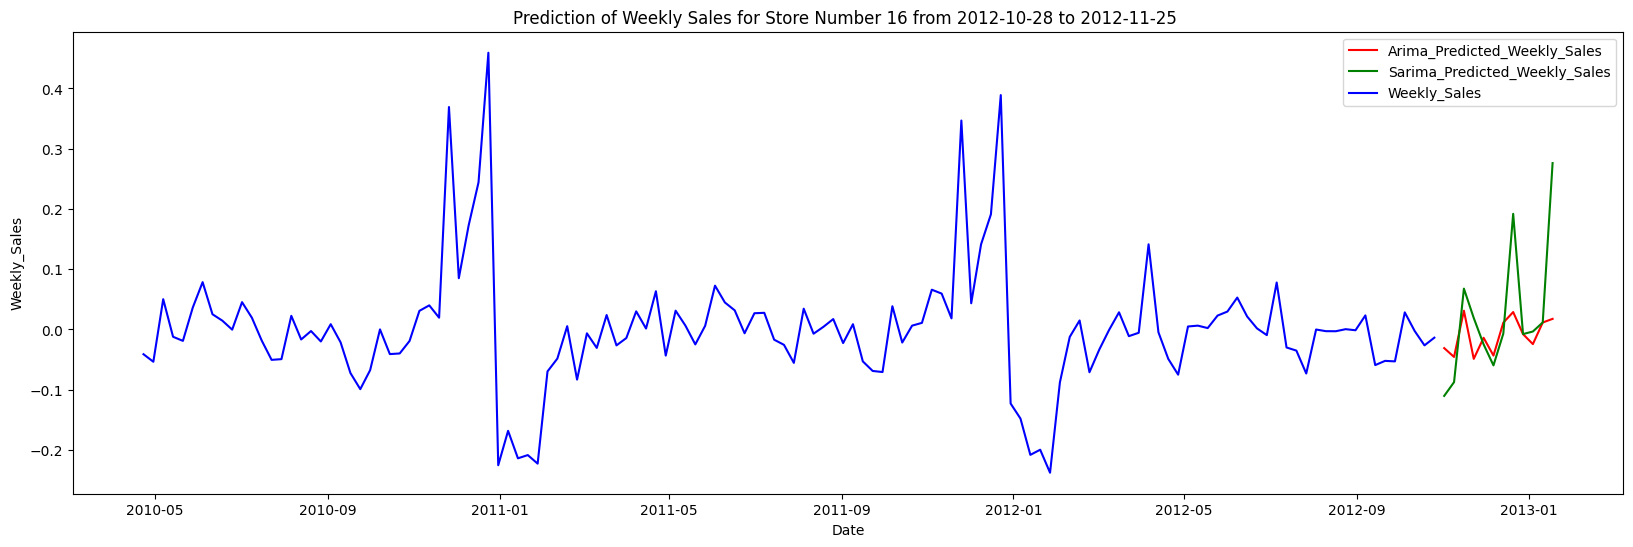

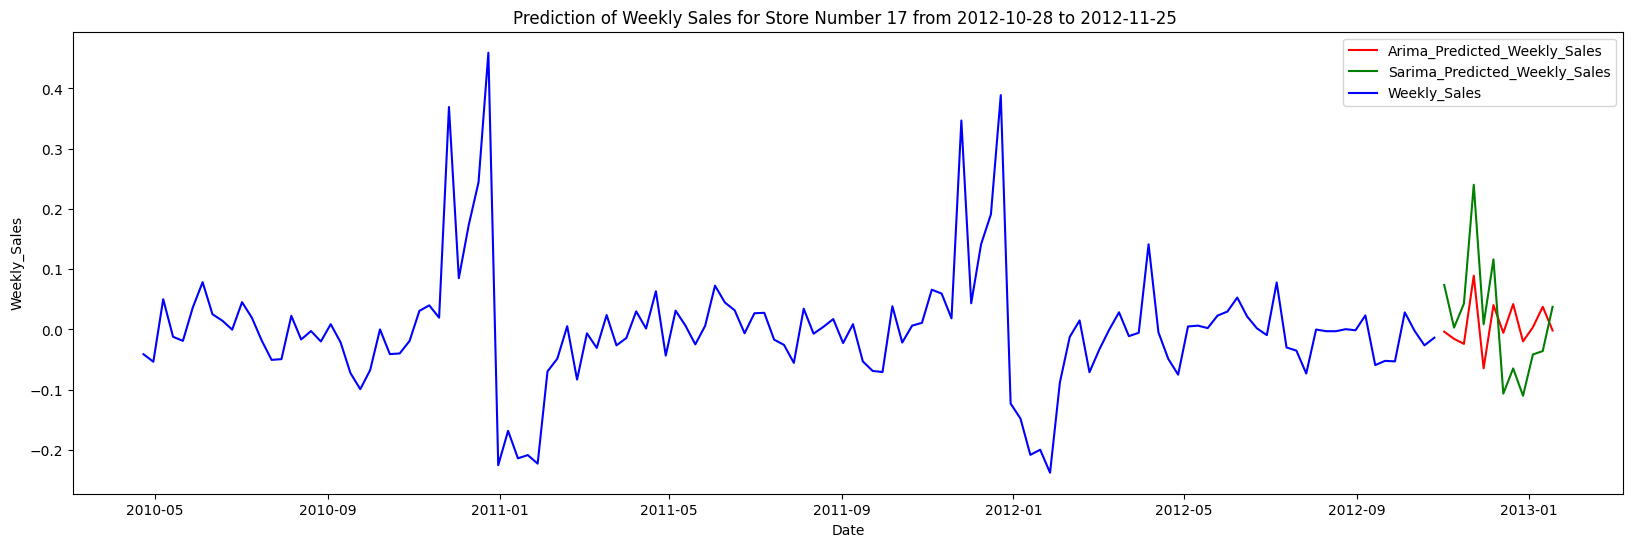

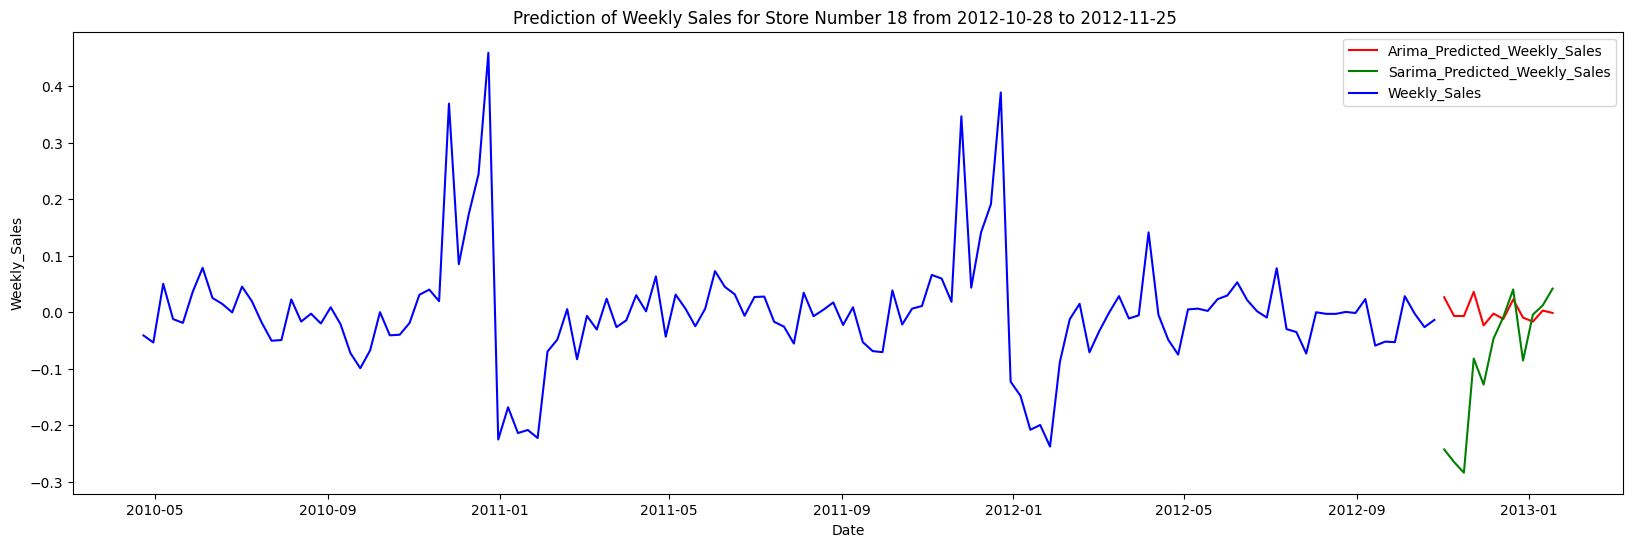

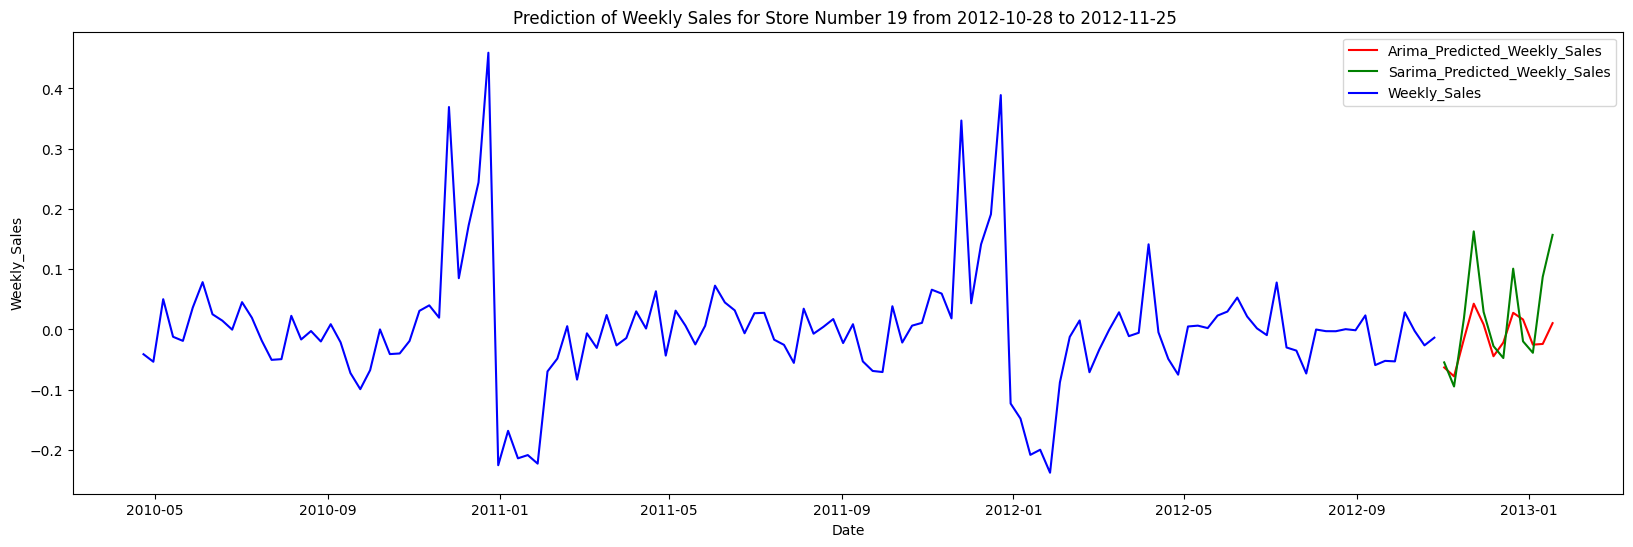

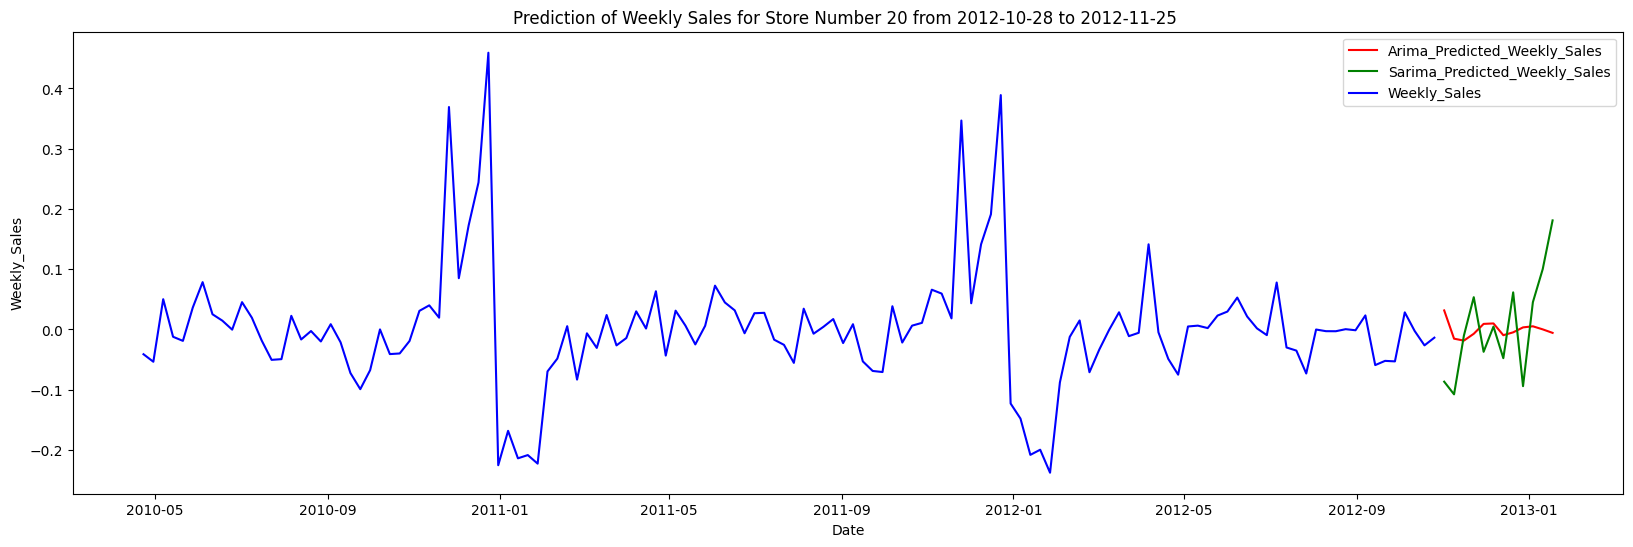

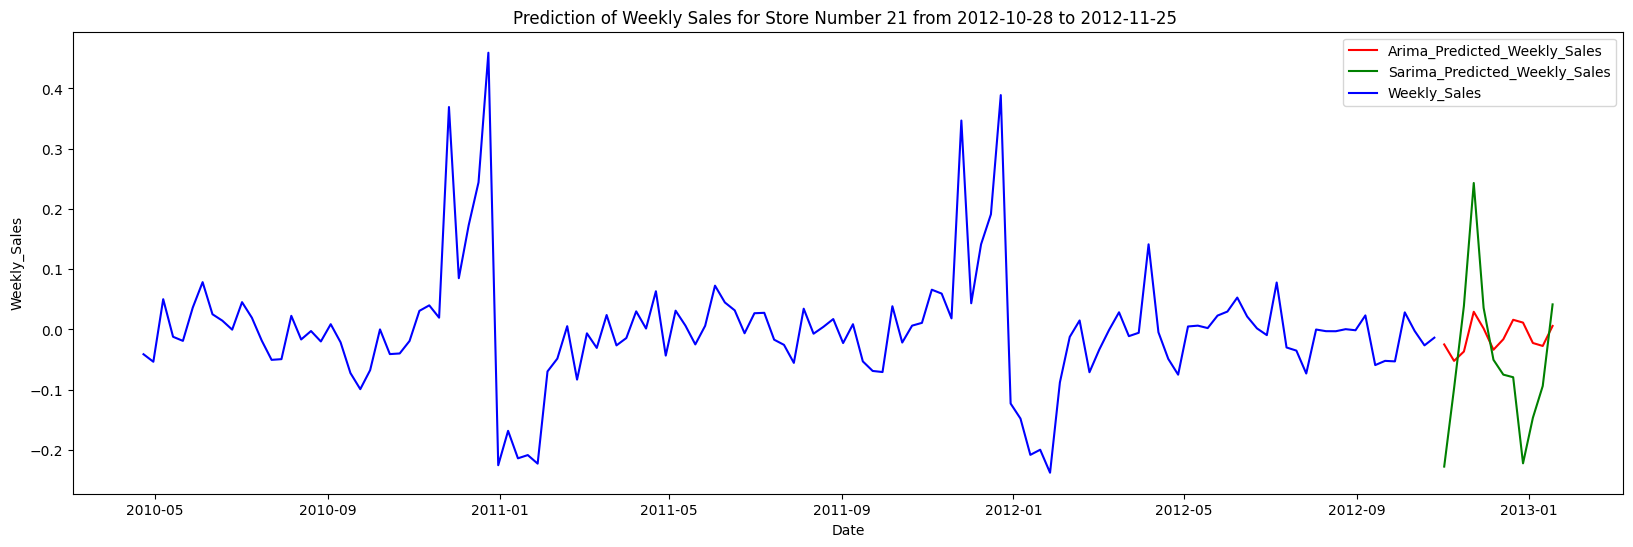

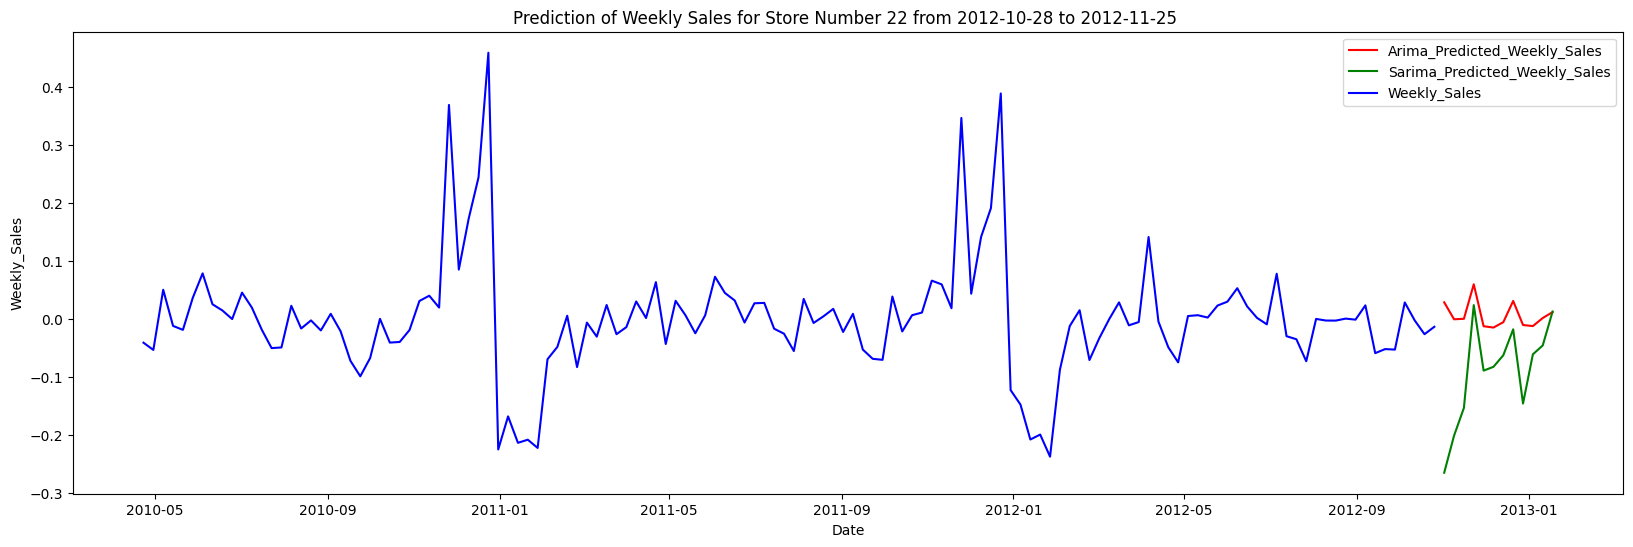

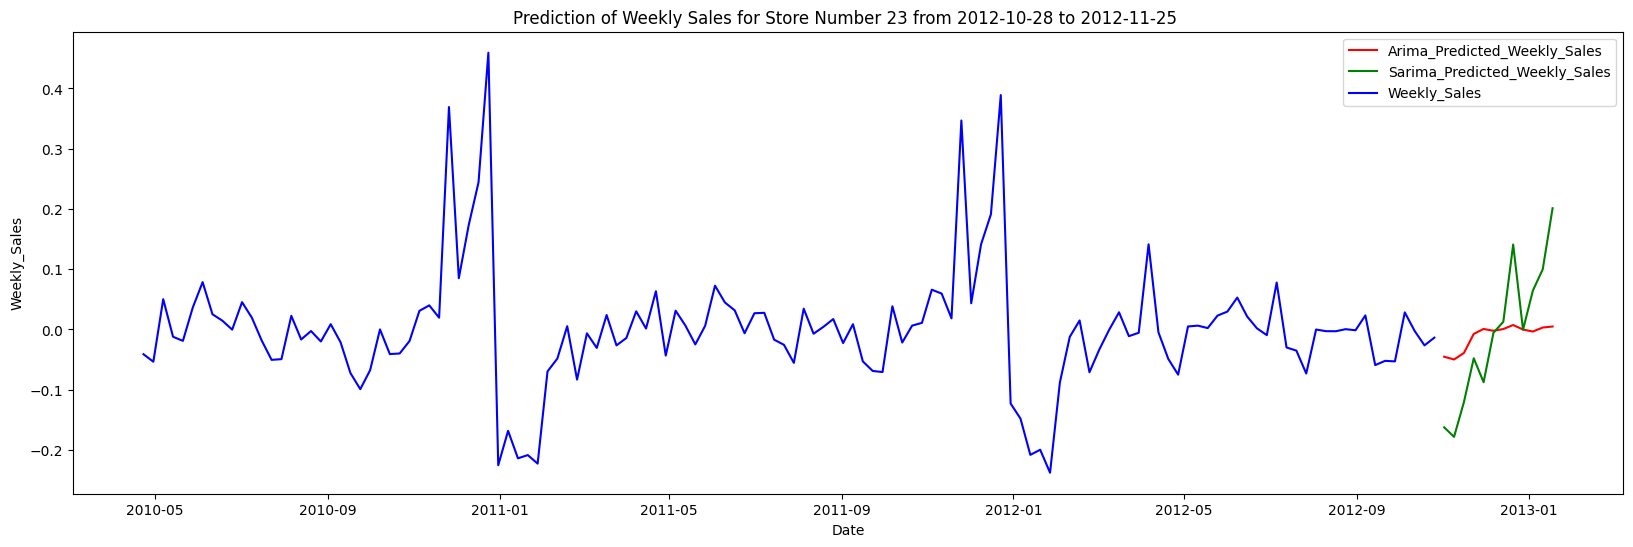

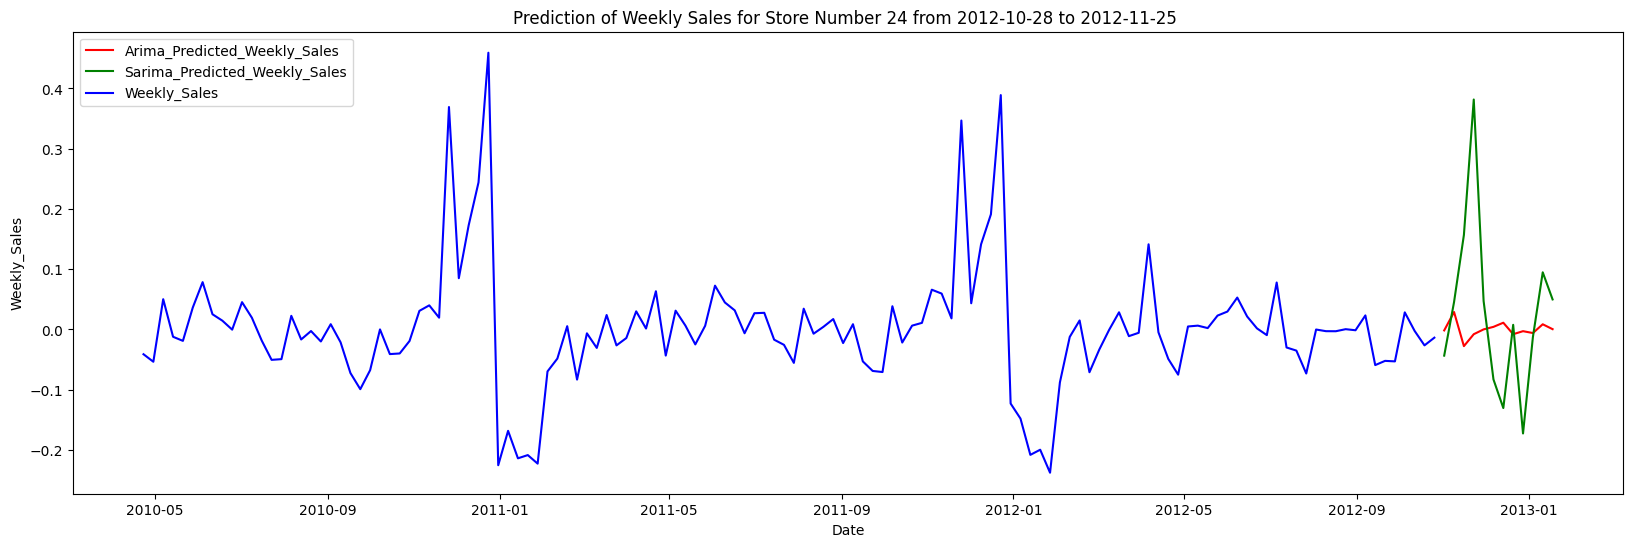

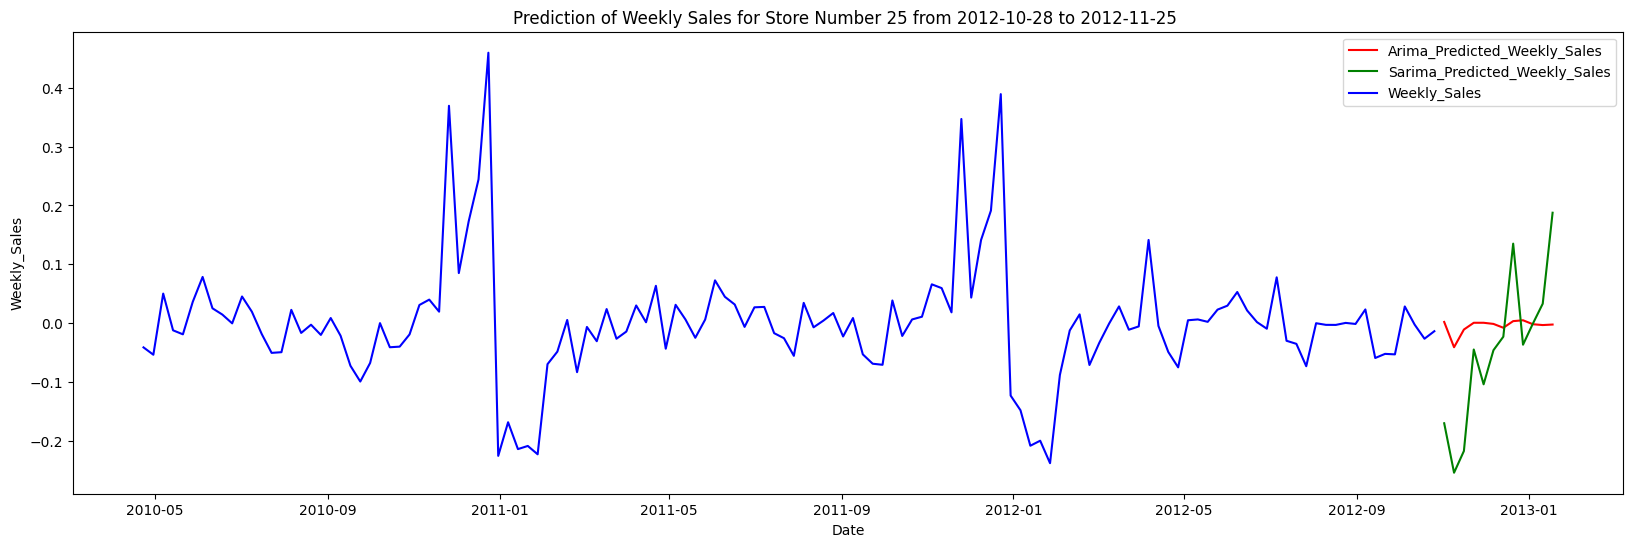

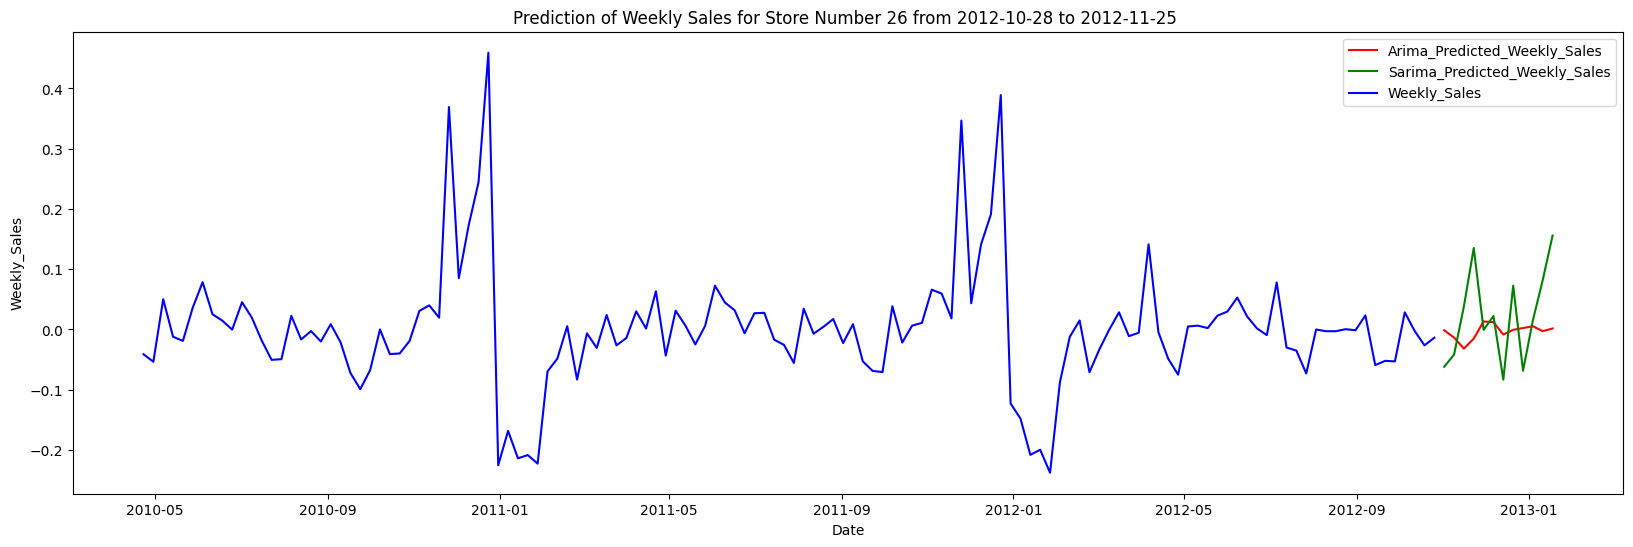

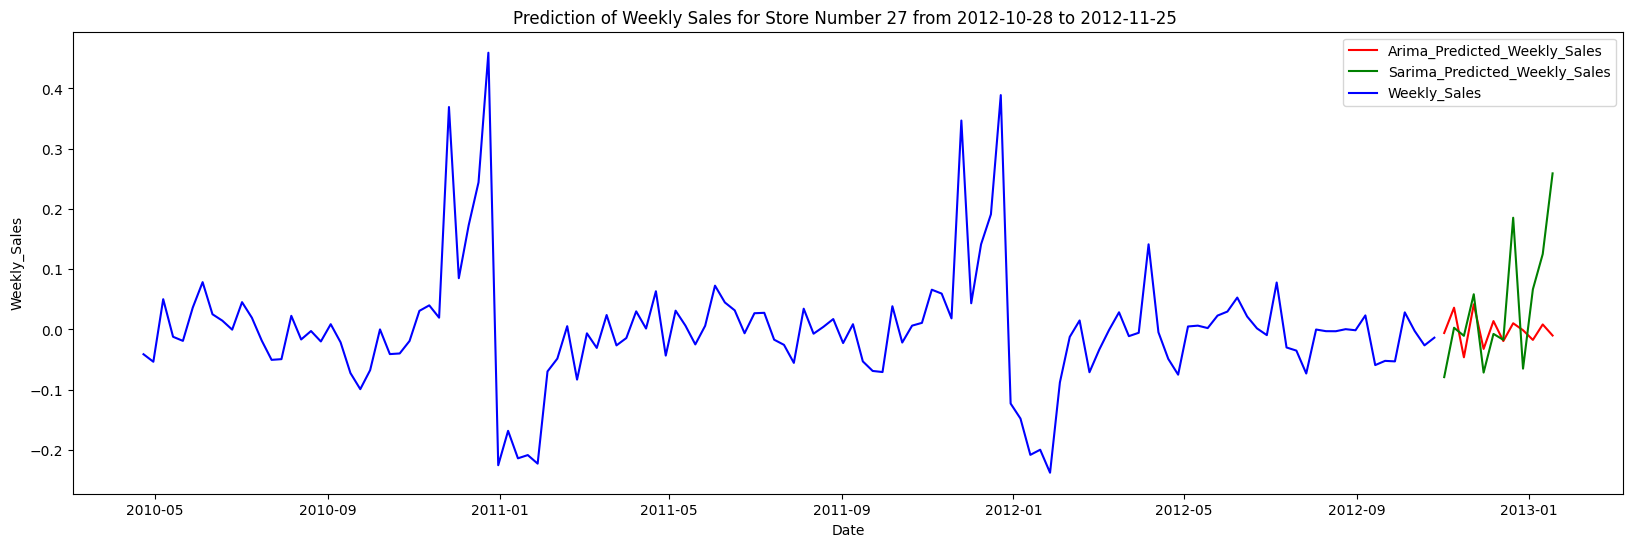

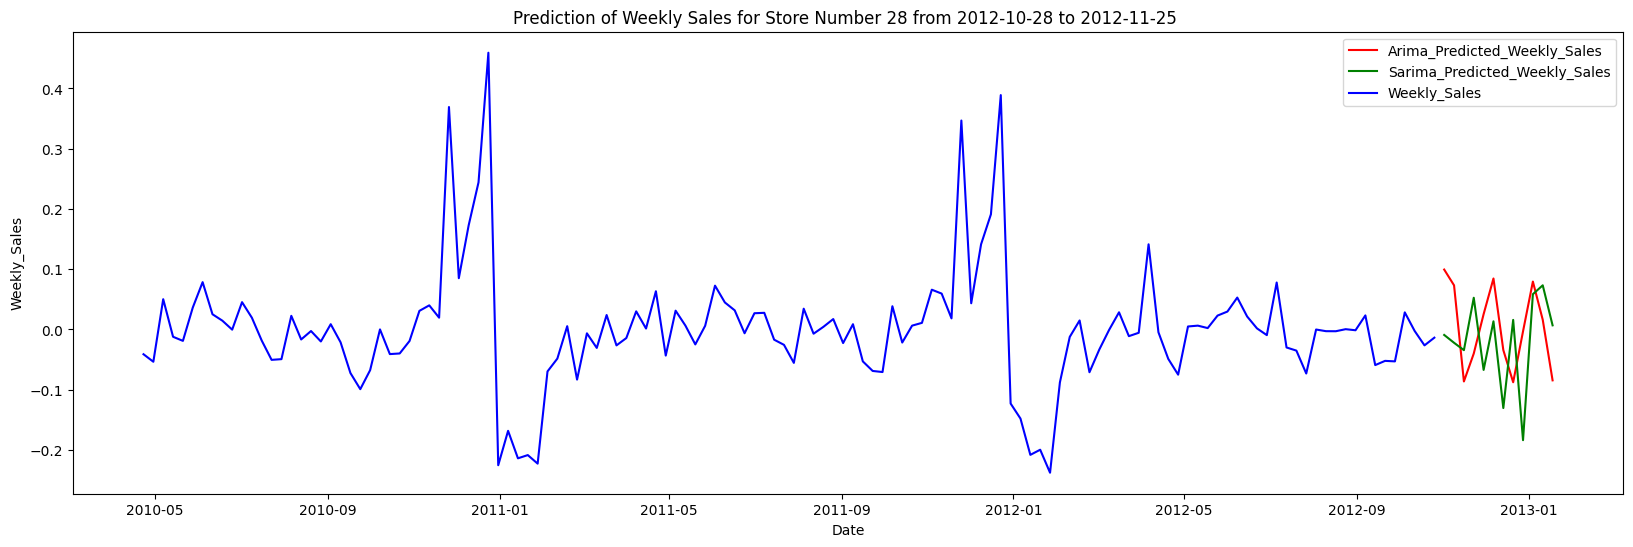

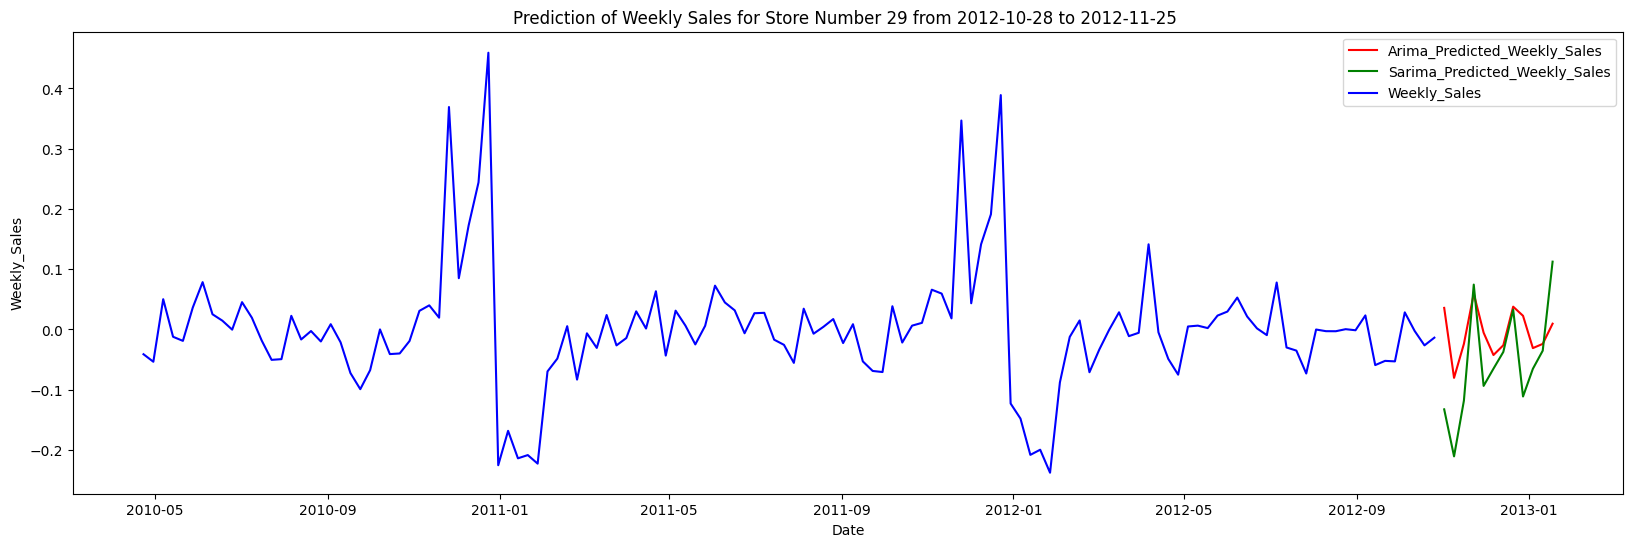

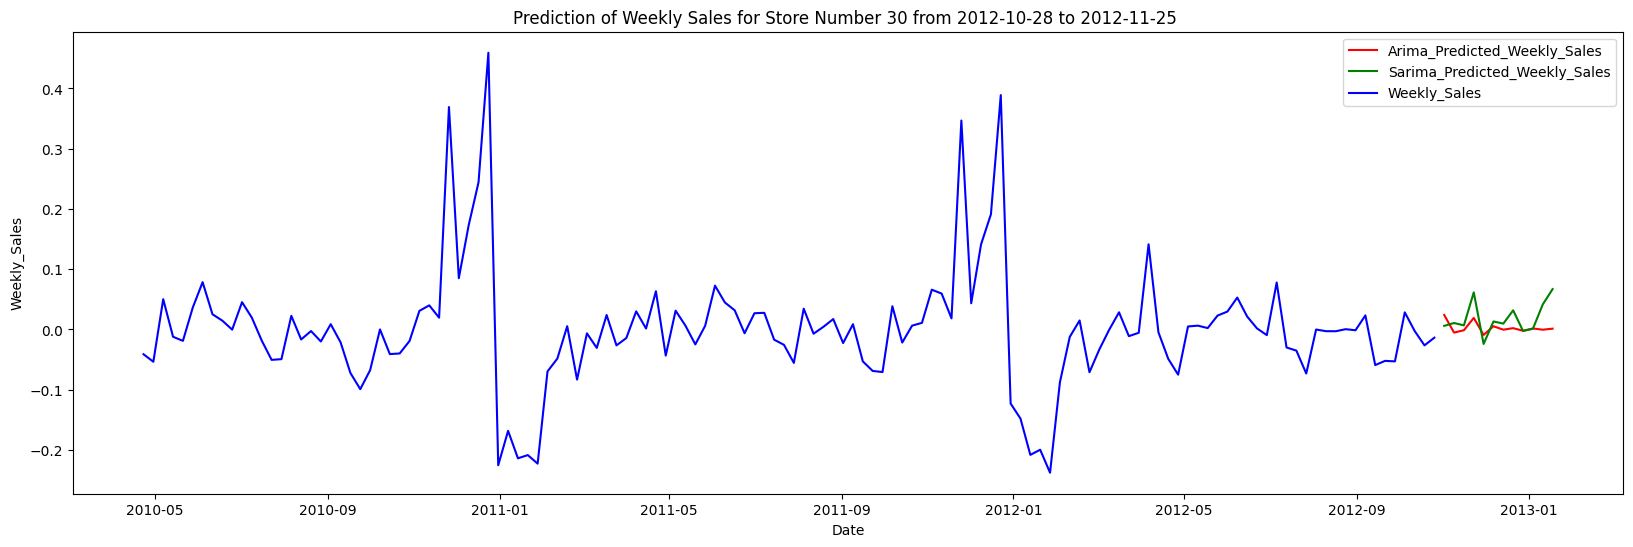

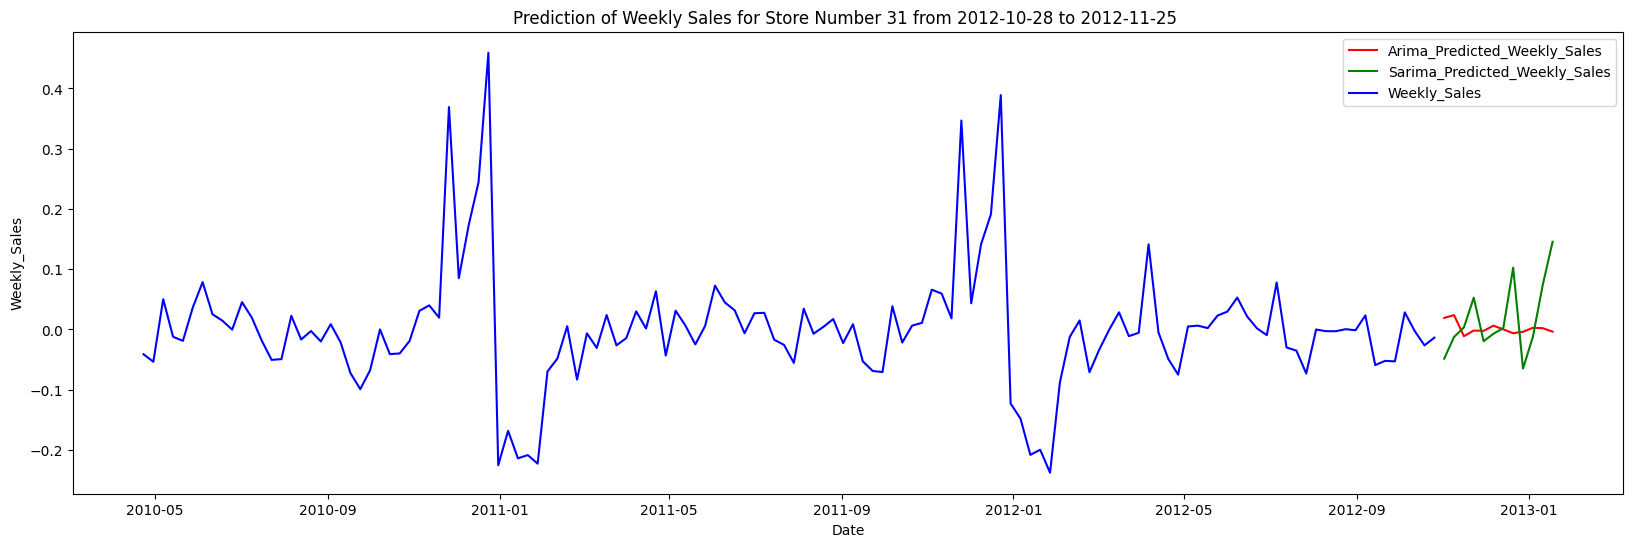

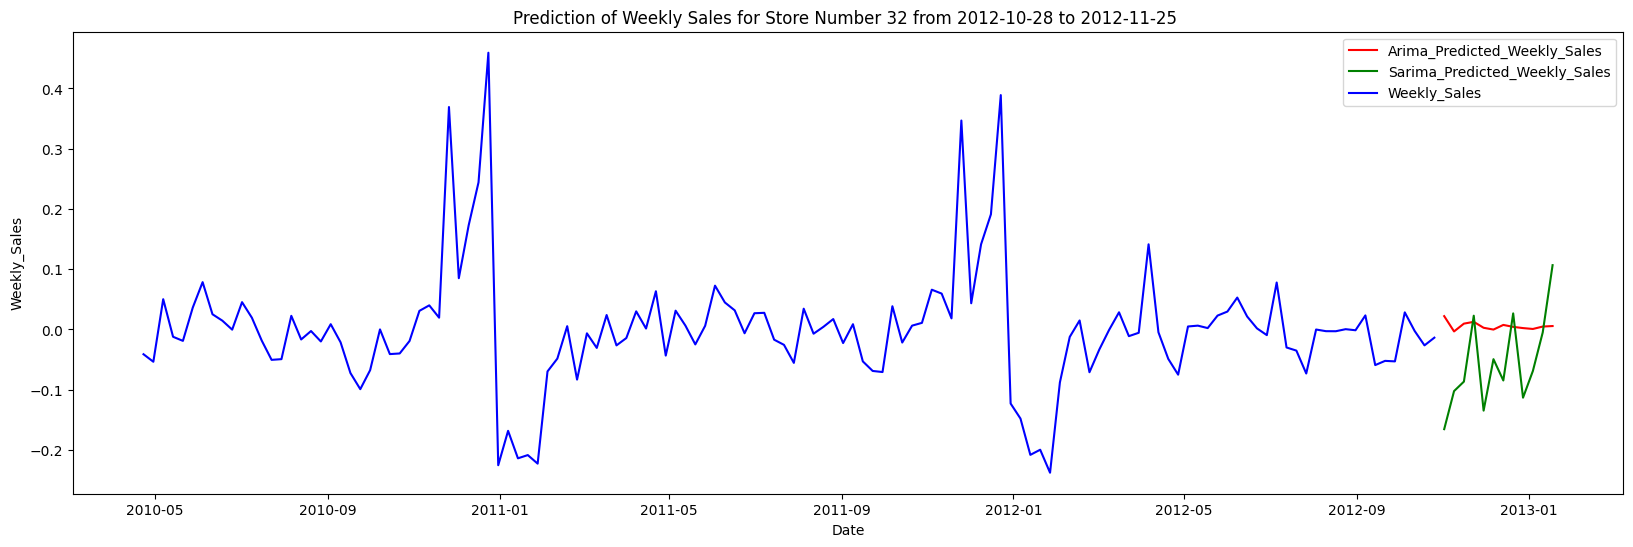

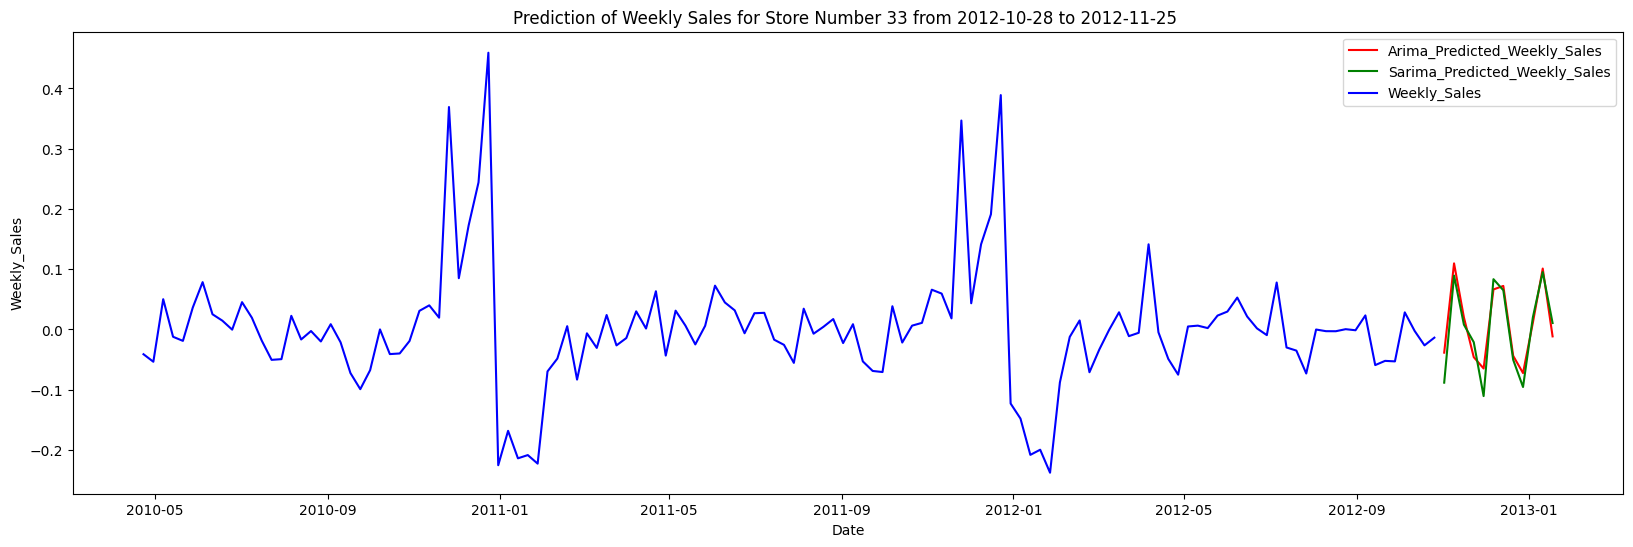

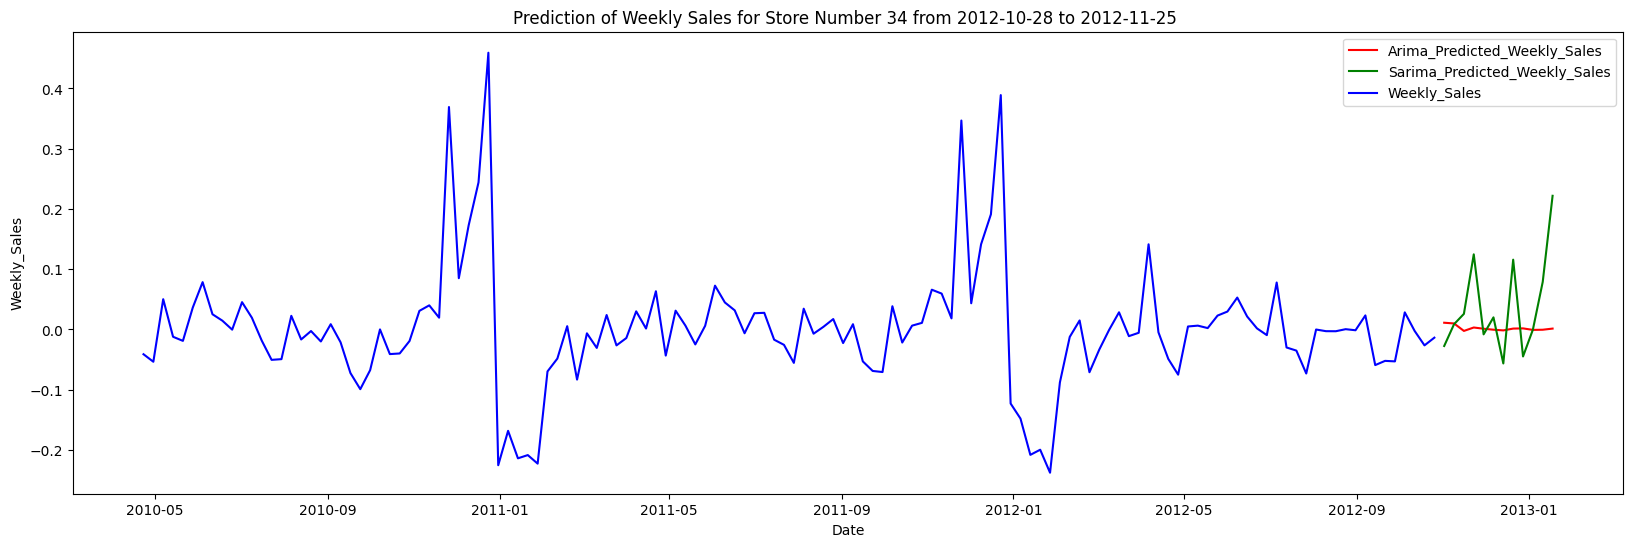

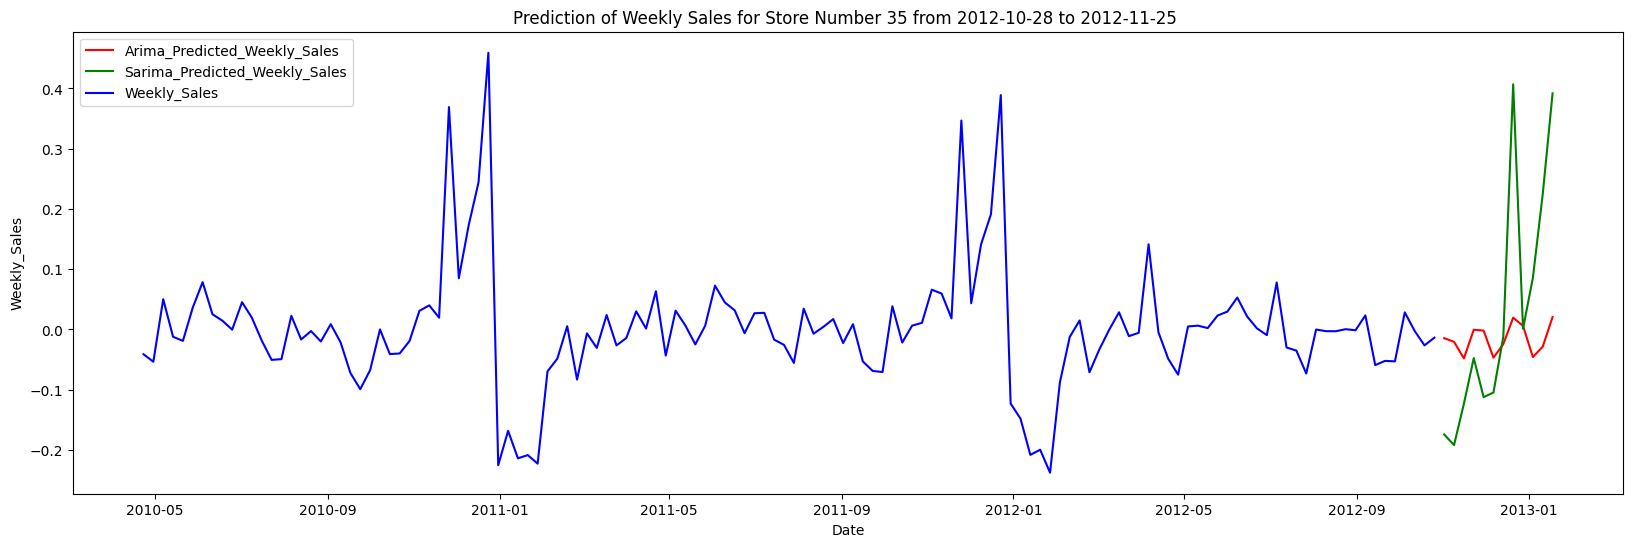

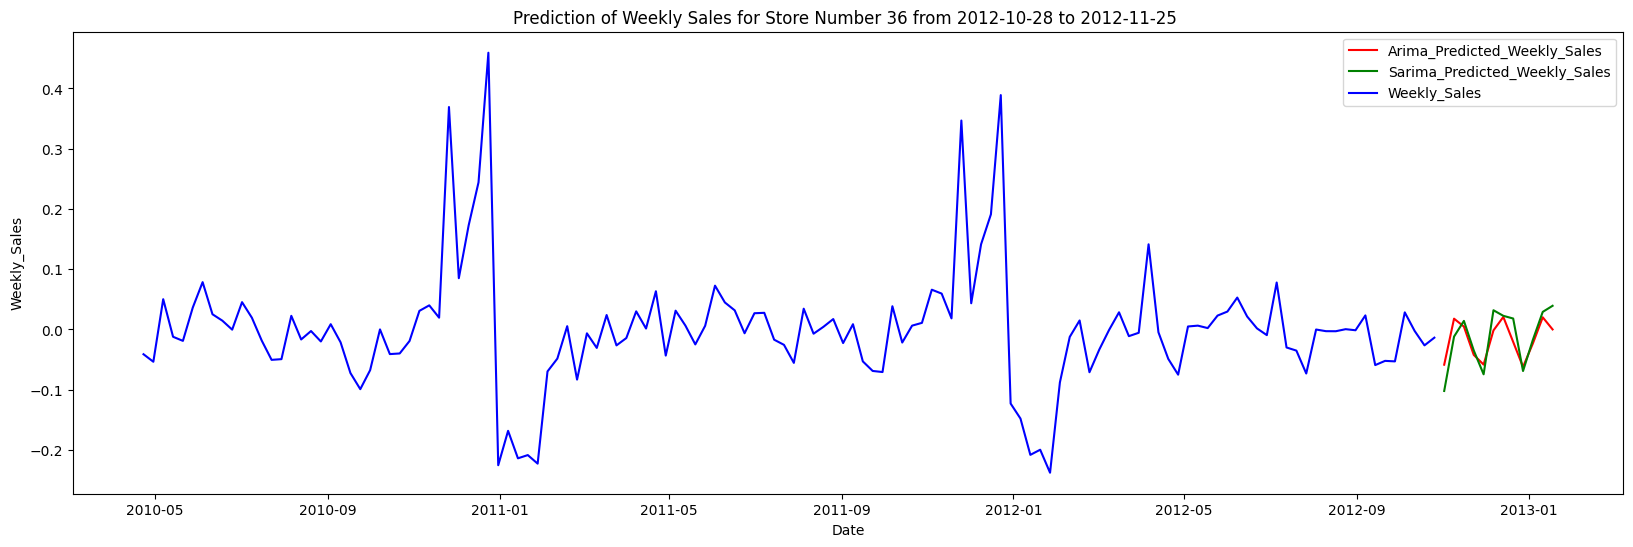

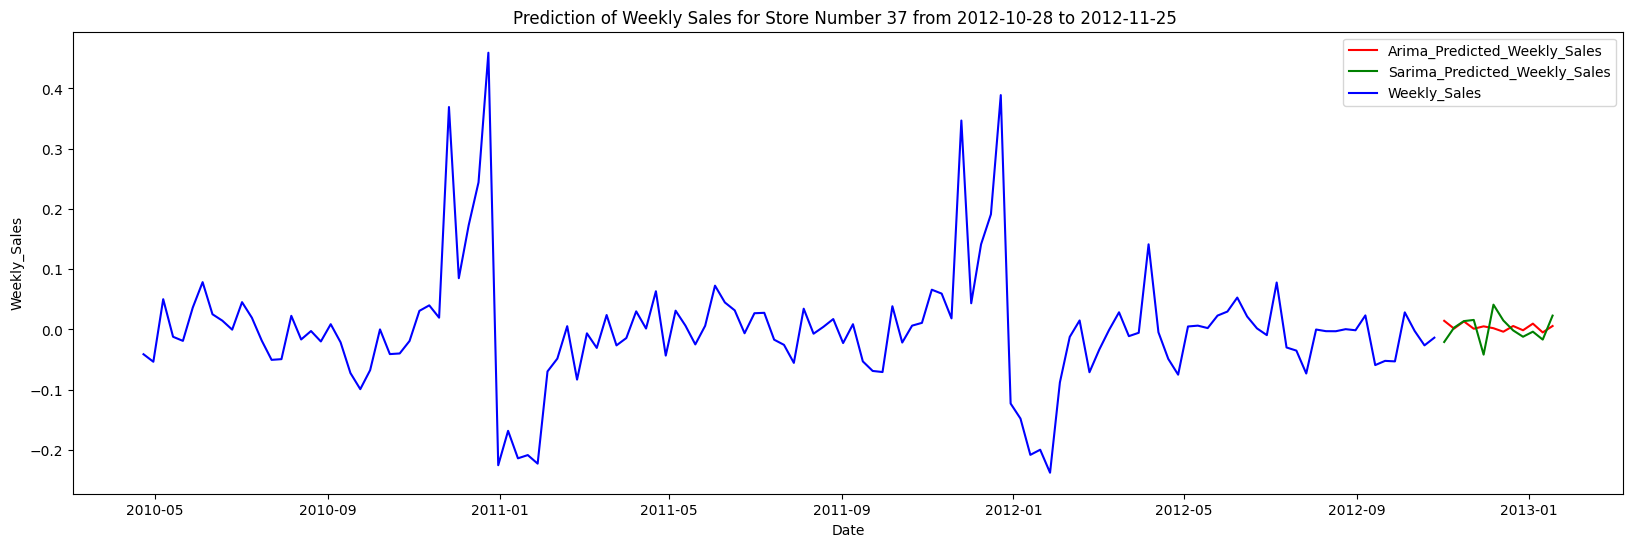

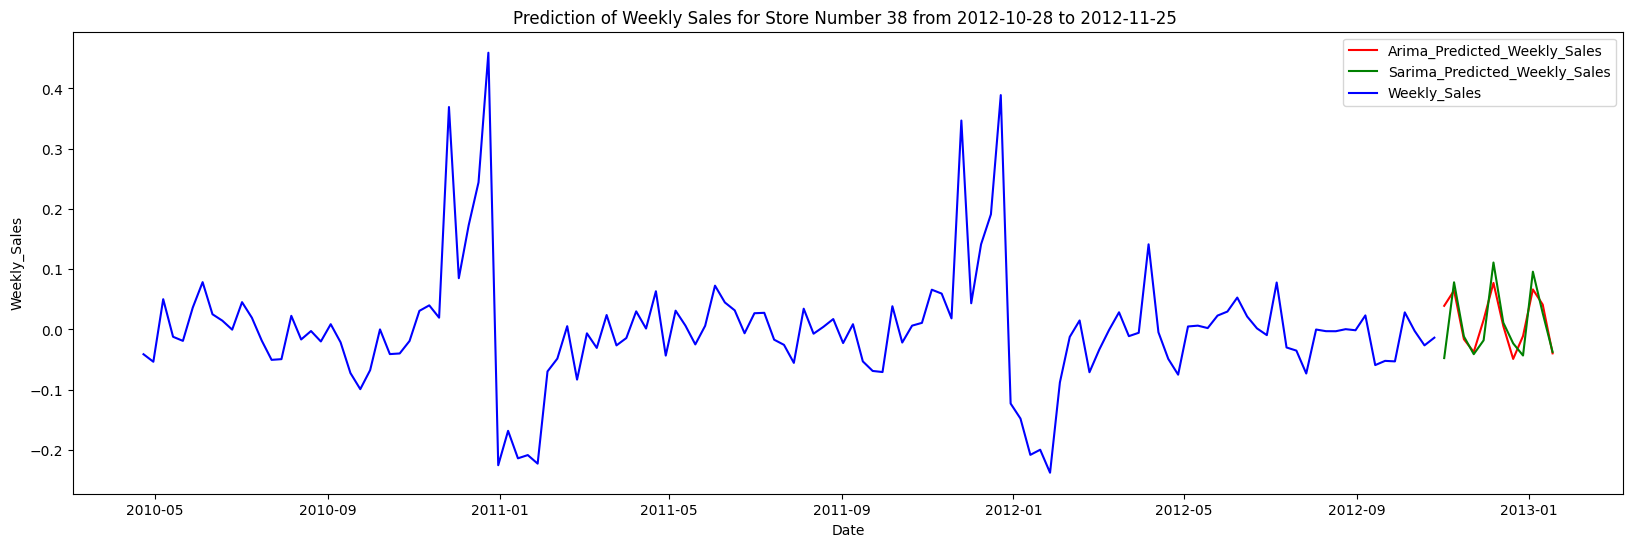

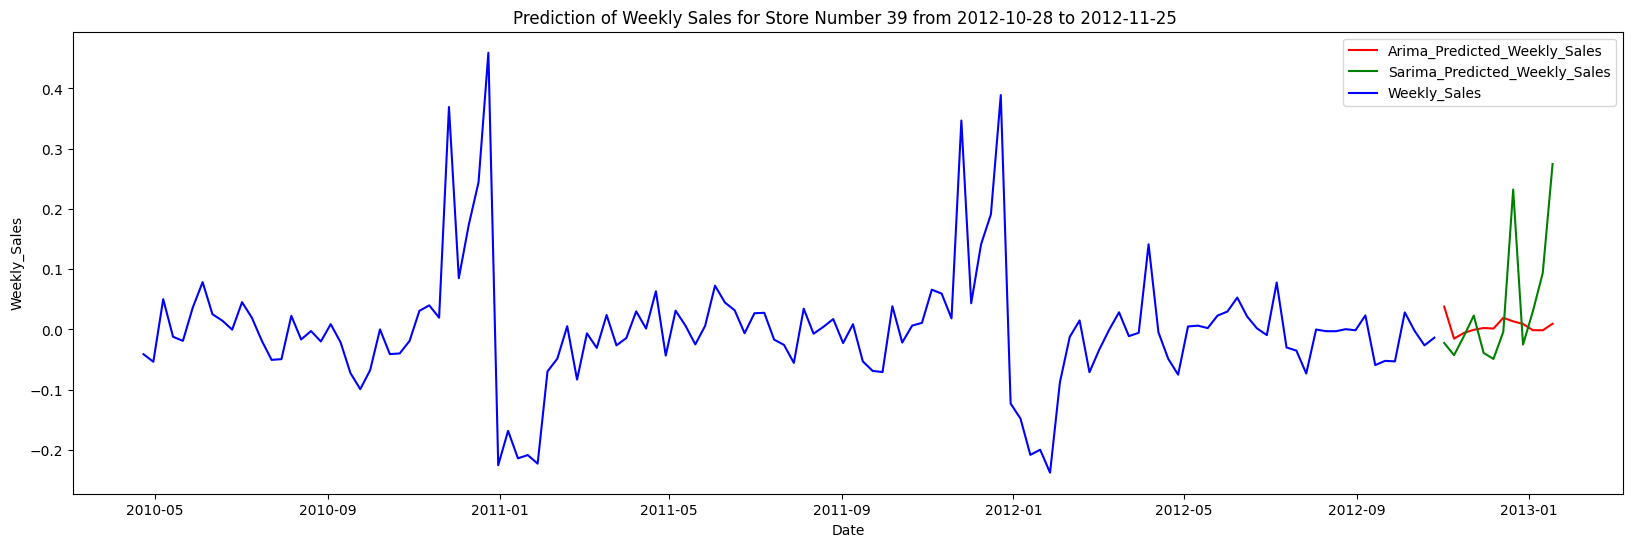

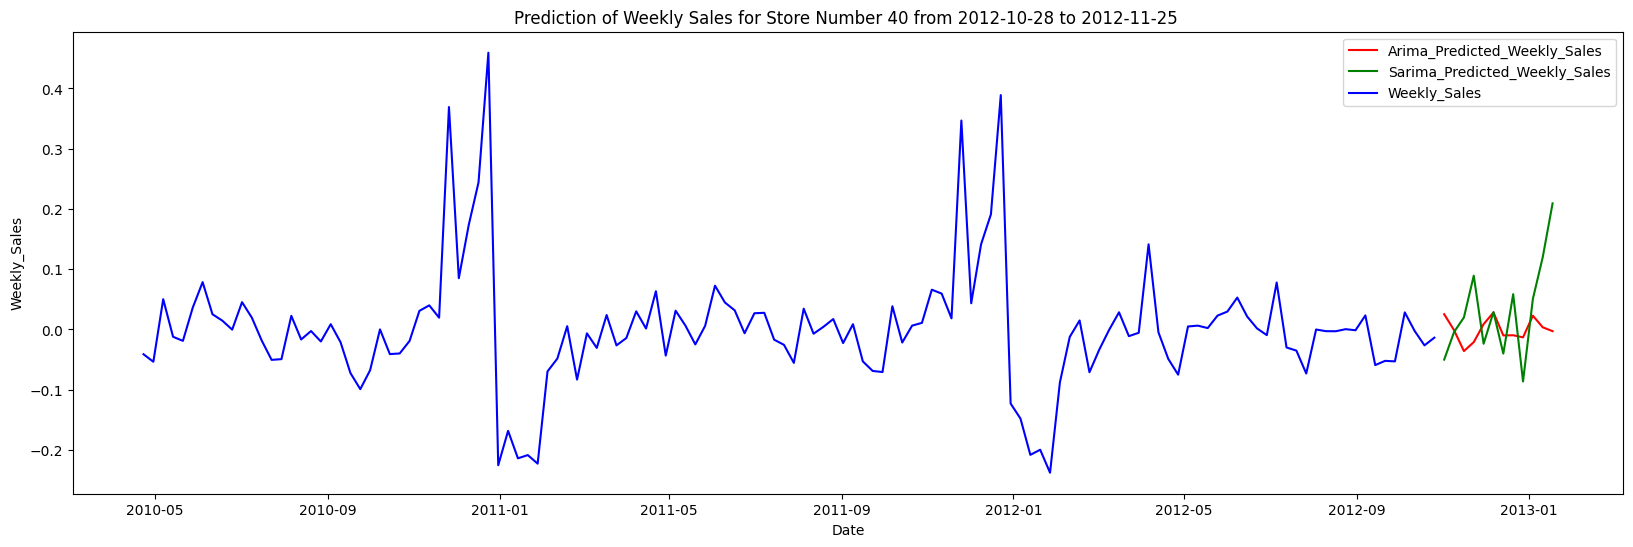

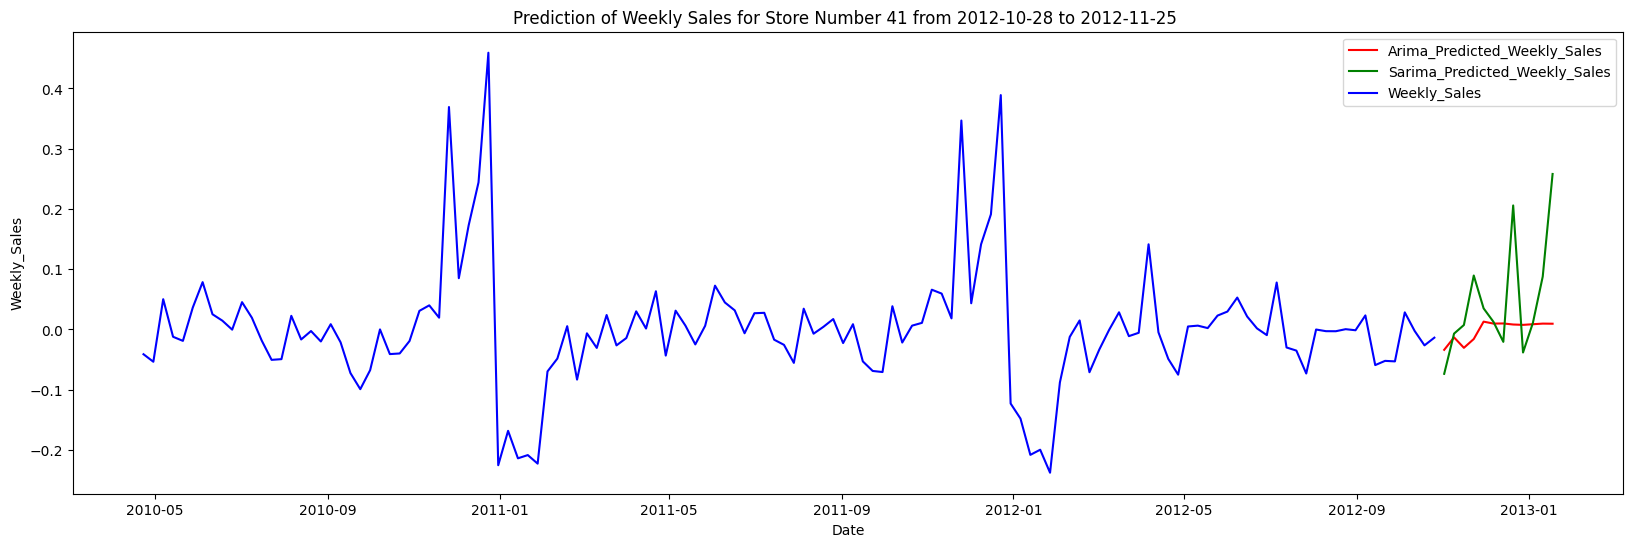

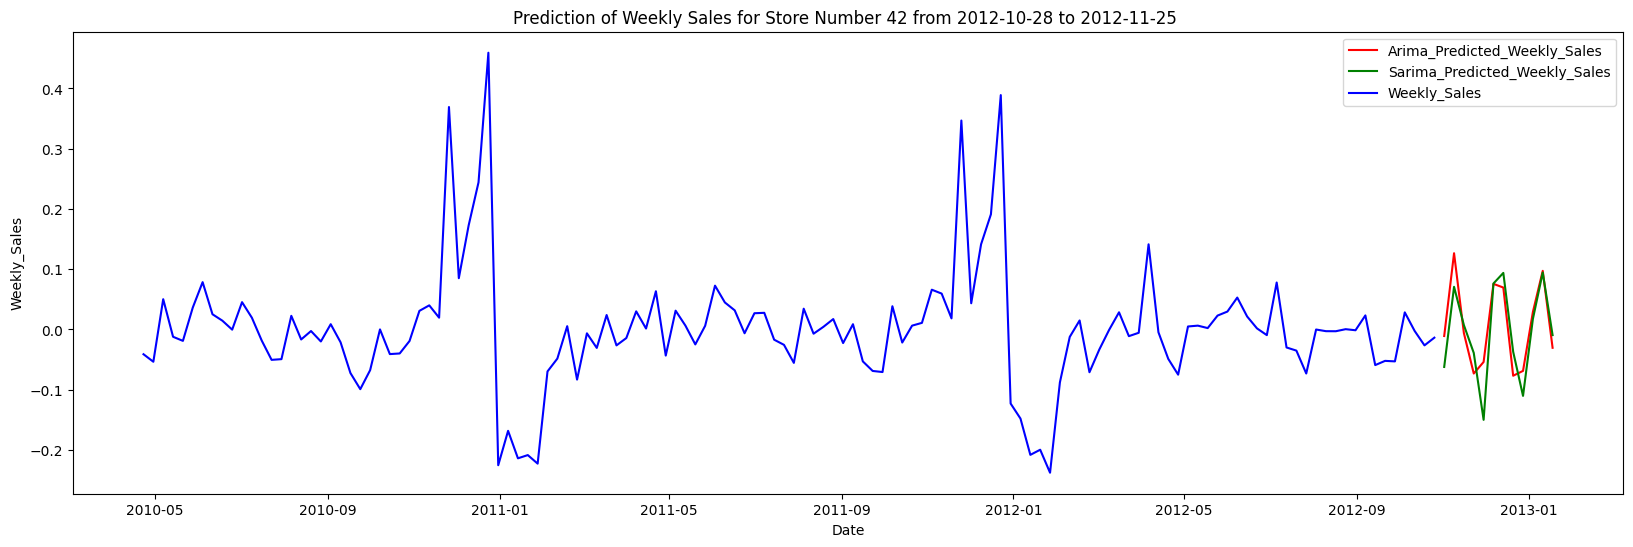

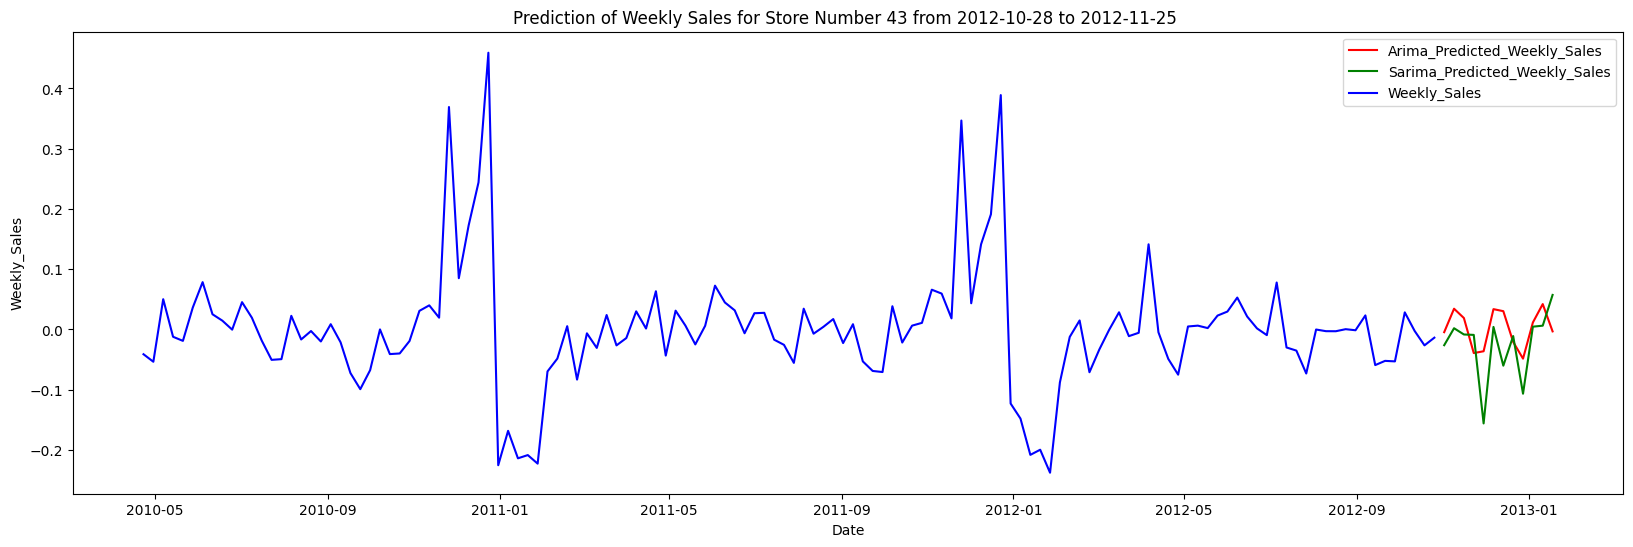

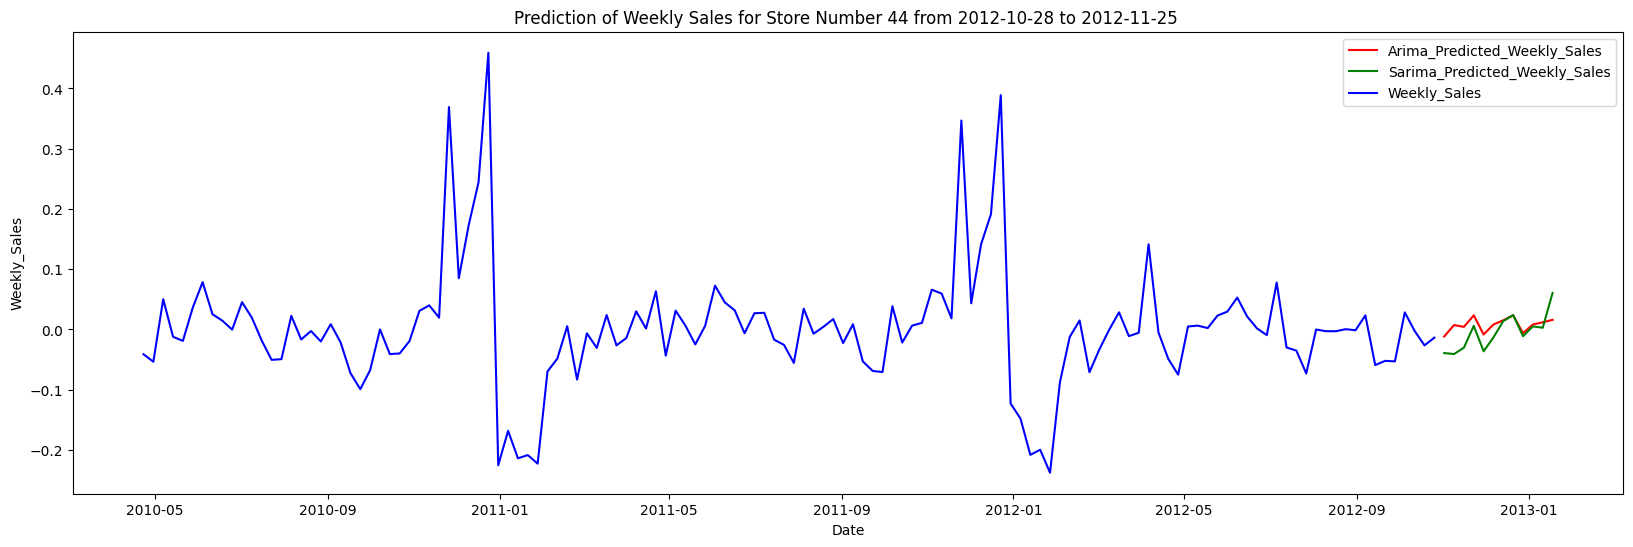

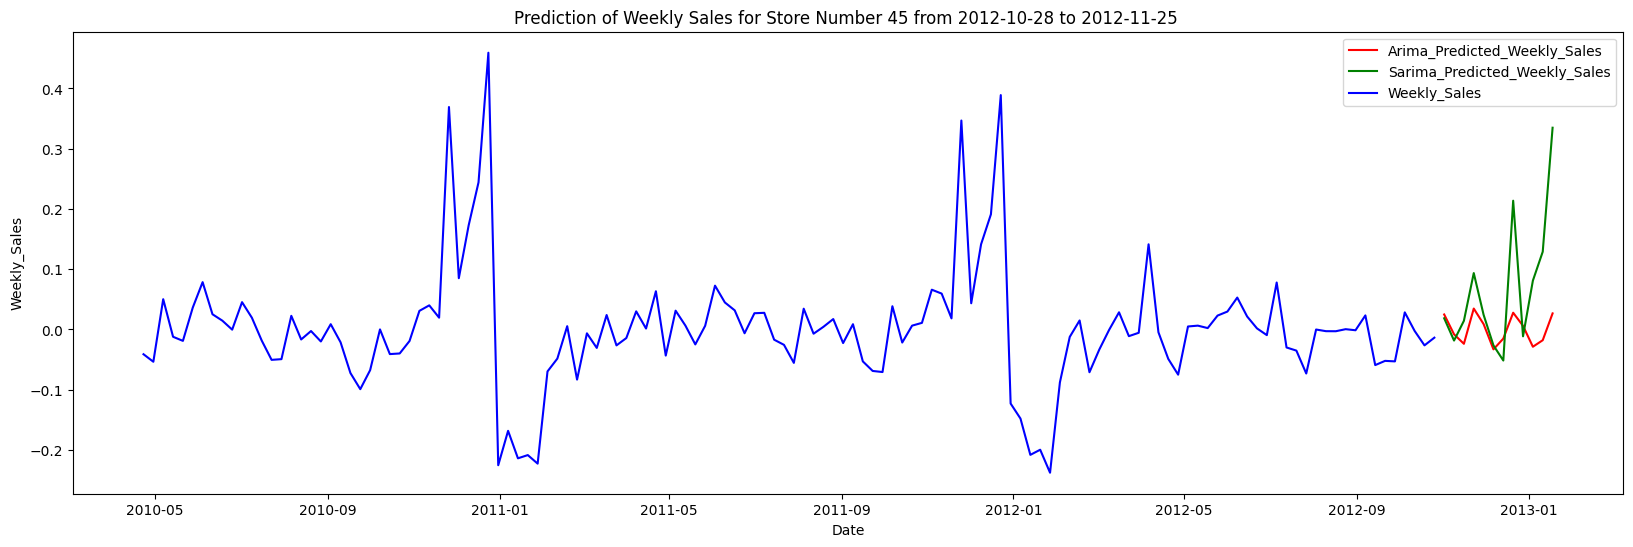

In [ ]:
# visualize the prediction
for i in All_Store_forecast.Store.unique():
  store_num= All_Store_forecast[All_Store_forecast["Store"]== i]
  plt.figure(figsize=(20,6))
  plt.plot(store_num["Arima_Predicted_Weekly_Sales"],label="Arima_Predicted_Weekly_Sales",color="red")
  plt.plot(store_num["Sarima_Predicted_Weekly_Sales"],label="Sarima_Predicted_Weekly_Sales",color="green")
  plt.plot(sale_log_new,label="Weekly_Sales",color="blue")
  plt.legend(loc="best")
  plt.title(f"Prediction of Weekly Sales for Store Number {i} from 2012-10-28 to 2012-11-25 ")
  plt.xlabel("Date")
  plt.ylabel("Weekly_Sales")
  plt.show()